In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scotia
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.spatial import distance_matrix
from scipy.stats import ranksums
from matplotlib.collections import LineCollection
from statsmodels.stats.multitest import multipletests
import warnings
warnings.filterwarnings("ignore")
import sys
from random import shuffle

In [2]:
datap = '~/project/1.pdac/simulation/'

In [561]:
df1 = pd.read_csv(datap+'data/011_all_fov_summary.csv.old',index_col=0)

In [562]:
df2 = df1[df1['fov']==5]
df2

,donor,fov,annotation,CenterX_local_px,CenterY_local_px,AATK,ABL1,ABL2,ACE,ACE2,...,NegPrb13,NegPrb14,NegPrb15,NegPrb16,NegPrb18,NegPrb19,NegPrb20,NegPrb21,NegPrb22,NegPrb23
c_1_5_2,11,5,Malignant,1033,3572,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
c_1_5_3,11,5,Malignant,1084,3568,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c_1_5_4,11,5,Malignant,1138,3573,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c_1_5_5,11,5,Malignant,1171,3567,0,0,0,0,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c_1_5_6,11,5,Malignant,1261,3570,0,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c_1_5_3180,11,5,Malignant,2412,24,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c_1_5_3181,11,5,Macrophage,3302,24,0,0,0,1,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
c_1_5_3182,11,5,Macrophage,2631,21,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c_1_5_3183,11,5,Macrophage,3928,19,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [563]:
df2.iloc[:,5:-1].mean(axis=0).median()

0.14094616639477978

In [564]:
df2.groupby('annotation').size().sort_values(ascending=False)

annotation
Malignant                   1510
CAF                          716
Macrophage                   632
Noise                         48
Endothelial                   28
CD8+ T                        24
Smooth muscle                 21
Mast                          20
Natural killer                15
Neutrophil                    11
Treg                           8
Plasma                         8
Pericyte                       8
CD4+ T                         6
uninformative_EVEN             5
Dendritic (activated)          2
B                              1
Dendritic (plasmacytoid)       1
Schwann/nerve                  1
dtype: int64

In [565]:
sel_ct = ['Malignant','CAF','Macrophage']
sel_ct = ['Malignant','CAF','Macrophage','Endothelial','CD8+ T','Smooth muscle','Mast']
df1['annotation_new'] = [x if x in sel_ct else 'others' for x in df1['annotation'] ]
#df1.to_csv(datap+'data/011_4_celltypes.csv')
#df1.to_csv(datap+'data/011_8_celltypes.csv')

In [566]:
df2 = df1[df1['fov']==5]

In [574]:
gene_list = list(df2.columns)[5:-1]
df_ave = df2.groupby(['annotation_new'])[gene_list].mean()
1-df_ave.median(axis=1).median()

0.9085213032581454

In [1689]:
df_convert = {
    "Malignant":"Celltype1",
    "Macrophage":"Celltype2",
    "CAF":"Celltype3",
    "others": "Celltype4"}

df_convert = {
    "Malignant":"Celltype1",
    "Macrophage":"Celltype2",
    "CAF":"Celltype3",
    "others": "Celltype4",
    "CD8+ T":"Celltype5",
    "Endothelial":"Celltype6",
    "Mast":"Celltype7",
    "Smooth muscle": "Celltype8",
}


In [1691]:
lr_pairs = pd.read_csv(datap+'data/cosMx_l_r_pairs.txt',header=None,sep='\t')
lr_pairs.columns = ['protein_a','protein_b']
lr_pairs['celltypeA'] = [df_convert[df_ave[x].idxmax()] for x in lr_pairs['protein_a']]
lr_pairs['celltypeB'] = [df_convert[df_ave[x].idxmax()] for x in lr_pairs['protein_b']]
#lr_pairs.to_csv(datap+'data/cosmx_LR_dat.csv',index=None)
#lr_pairs.to_csv(datap+'data/cosmx_LR_dat_8ct.csv',index=None)

In [1690]:
lr_pairs = pd.read_csv(datap+'data/cosMx_l_r_pairs.txt',header=None,sep='\t')
lr_pairs.columns = ['protein_a','protein_b']
lr_pairs['celltypeA'] = ['Celltype'+str(random.randint(1, 4)) for x in lr_pairs.index]
lr_pairs['celltypeB'] = ['Celltype'+str(random.randint(1, 4)) for x in lr_pairs.index]
#lr_pairs.to_csv(datap+'data/cosmx_LR_dat_random.csv',index=None)

lr_pairs['celltypeA'] = ['Celltype'+str(random.randint(1, 8)) for x in lr_pairs.index]
lr_pairs['celltypeB'] = ['Celltype'+str(random.randint(1, 8)) for x in lr_pairs.index]


#lr_pairs.to_csv(datap+'data/cosmx_LR_dat_random_8ct.csv',index=None)

In [607]:
tmp = pd.read_csv(datap+'data/cosmx_LR_dat_random_8ct.csv')
tmp

,protein_a,protein_b,celltypeA,celltypeB
0,ADM2,RAMP1,Celltype7,Celltype3
1,ANGPT1,ITGA5,Celltype5,Celltype1
2,ANGPT1,ITGB1,Celltype1,Celltype4
3,ANGPT1,TEK,Celltype3,Celltype5
4,ANGPT1,TIE1,Celltype1,Celltype5
...,...,...,...,...
417,WNT5A,FZD8,Celltype6,Celltype2
418,WNT5A,ROR1,Celltype4,Celltype8
419,WNT5A,RYK,Celltype5,Celltype2
420,WNT7A,FZD5,Celltype2,Celltype5


In [1353]:
len(set(list(lr_pairs['protein_a'])+list(lr_pairs['protein_b'])))

282

# input simulated data

In [1147]:
name_tmp = '1fc'
name_tmp = '5fc'
name_tmp = '10fc'
#name_tmp = '5fc_no_ref'
#name_tmp = '5fc_no_ref_zero0.8'
#name_tmp = '1fc_no_ref_zero0.8'
#name_tmp = '1fc_no_ref_zero0.1'
#name_tmp = '10fc_no_ref_zero0.8'
name_tmp = '10fc_no_ref_zero0.1'


meta_df = pd.read_csv(datap+'data/simu_'+name_tmp+'_meta.csv',index_col=0)
#meta_df = pd.read_csv(datap+'data/simu_starmap_5fc_meta.csv',index_col=0)

meta_df.columns = ['x_pos','y_pos','region_label','annotation']
count_df = pd.read_csv(datap+'data/simu_'+name_tmp+'_counts.csv',index_col=0)
#count_df = pd.read_csv(datap+'data/simu_starmap_5fc_counts.csv',index_col=0)

meta_df.index = count_df.index
df_summary = meta_df.join(count_df)
df_summary.to_csv(datap+'data/simu_'+name_tmp+'_meta_exp.csv')

In [1152]:
df_summary.groupby('annotation').size()

annotation
Celltype1    773
Celltype2    778
Celltype3    756
Celltype4    693
dtype: int64

In [1153]:
df_summary['x_pos'].max()-df_summary['x_pos'].min()

972.7198594430691

In [1154]:
#dbscan clustering
celltype = []
cell_idx = []
meta_df_fov = pd.read_csv(datap+'data/simu_'+name_tmp+'_meta_exp.csv',index_col=0)
#meta_df_fov = pd.read_csv(datap+'data/simu_5fc_starmap_meta_exp.csv',index_col=0)
meta_df_fov['index'] = range(meta_df_fov.shape[0])

cell_type_l = list(set(meta_df_fov['annotation']))
for ct in cell_type_l:
    ###cluster cells
    #print(ct)
    meta_df_sel = meta_df_fov[meta_df_fov['annotation']==ct]
    X = np.array(meta_df_sel[['x_pos','y_pos']])
    if X.shape[0] >= 5:
        print(ct)
        #idx_l, fi_eps = scotia.dbscan_ff_cell(X, X_index_arr=np.array(meta_df_sel['index']),eps_l = list(range(10,1300,10))) #final
        idx_l, fi_eps = scotia.dbscan_ff_cell(X, X_index_arr=np.array(meta_df_sel['index'])) #final
        if len(idx_l)>0:
            celltype += [ct for x in idx_l]
            cell_idx += idx_l
tmp_df = pd.DataFrame([celltype,cell_idx]).T
#np.save(datap+'output/clustering/dbscan.cell.clusters.test',tmp_df) #final
np.save(datap+'output/clustering/'+name_tmp+'_dbscan.cell.clusters.test',tmp_df) #final
#np.save(datap+'output/clustering/starmap_dbscan.cell.clusters.test',tmp_df) #final

Celltype4
eps: 40
Celltype2
eps: 35
Celltype1
eps: 35
Celltype3
eps: 40


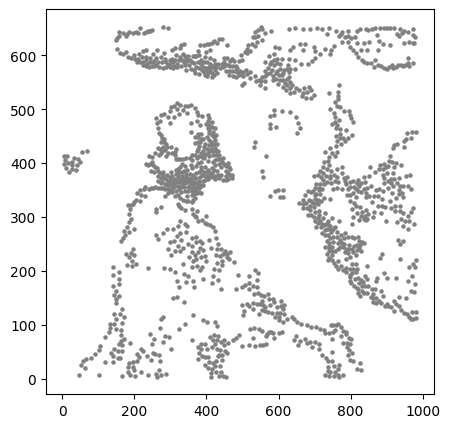

In [425]:

plt.figure(figsize=(5,5))
meta_df_sel = df2[df2['annotation']=='Malignant']
X_sel = np.array(meta_df_sel[['CenterX_local_px','CenterY_local_px']])*0.18
plt.scatter(X_sel[:,0],X_sel[:,1],c = 'grey',s = 5)

Celltype4


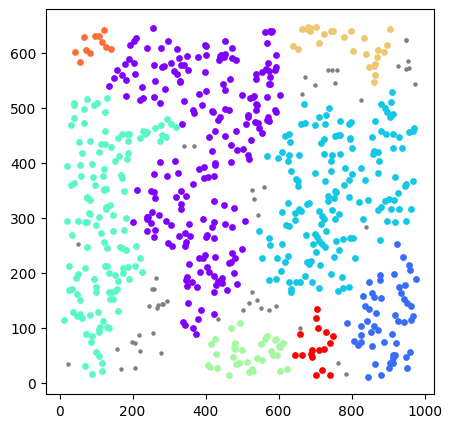

Celltype2


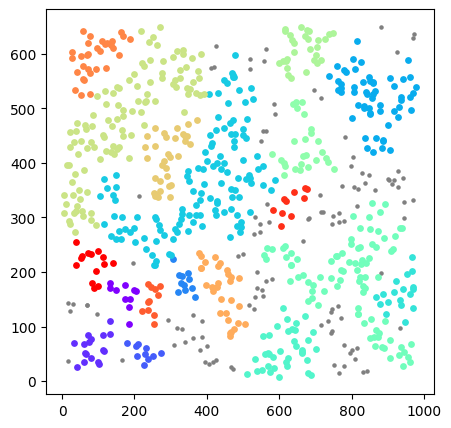

Celltype1


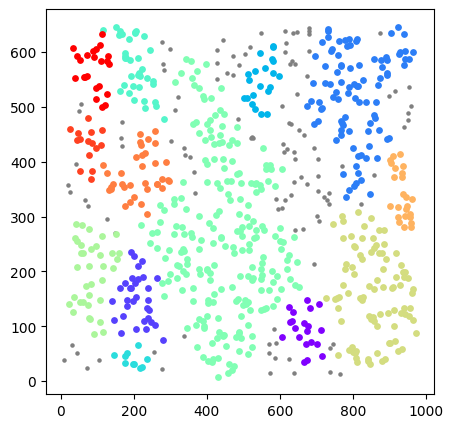

Celltype3


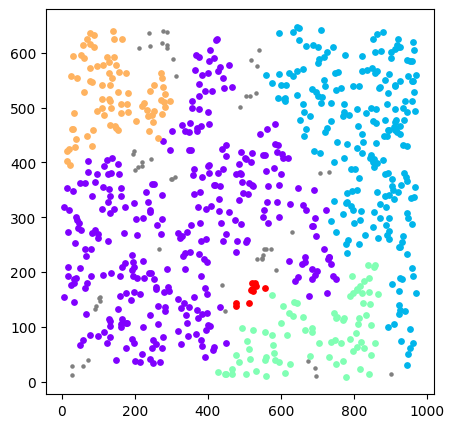

In [1155]:
#visualization of DBSCAN clustering result

#cluster_df = pd.DataFrame(np.load(datap+'output/clustering/dbscan.cell.clusters.test.npy',allow_pickle=True))
cluster_df = pd.DataFrame(np.load(datap+'output/clustering/'+name_tmp+'_dbscan.cell.clusters.test.npy',allow_pickle=True))
#cluster_df = pd.DataFrame(np.load(datap+'output/clustering/starmap_dbscan.cell.clusters.test.npy',allow_pickle=True))

cluster_df.columns = ['cell_type','cell_idx']

meta_df_fov = pd.read_csv(datap+'data/simu_'+name_tmp+'_meta_exp.csv',index_col=0)
#meta_df_fov = pd.read_csv(datap+'data/simu_5fc_starmap_meta_exp.csv',index_col=0)
meta_df_fov.index = range(meta_df_fov.shape[0])
cell_type_l = list(set(cluster_df['cell_type']))
for ct in cell_type_l:
    print(ct)
    plt.figure(figsize=(5,5))
    #plot all ct cells
    #higlight clusters for ct cells
    tmp_ct = cluster_df[cluster_df['cell_type']==ct]
    colors = cm.rainbow(np.linspace(0, 1, tmp_ct.shape[0]))
    if tmp_ct.shape[0]>0:
        meta_df_sel = meta_df_fov[meta_df_fov['annotation']==ct]
        X_sel = np.array(meta_df_sel[['x_pos','y_pos']])
        plt.scatter(X_sel[:,0],X_sel[:,1],c = 'grey',s = 5)



        for n,line in enumerate(tmp_ct['cell_idx']):
            X = np.array(meta_df_fov.loc[line][['x_pos','y_pos']])
            plt.scatter(X[:,0],X[:,1],color =colors[n],s = 15)
        #plt.savefig(datap+'example/output/Figs/'+group+'_fov_'+str(fov)+"_"+ct+".cluster.pdf", dpi=100, tansparent=True)
        plt.show()

In [1651]:
df_test = pd.read_csv(datap + 'data/test.csv',index_col=0)
df_test.columns = [x.split(".")[0] for x in df_test.columns]
df_test2 = df_test.stack().reset_index()
df_test2.columns = ['gene','ct','counts']
df_test2 = df_test2[df_test2['gene']=='ITGA5']
df_test2.groupby(['ct'])['counts'].mean()

ct
Celltype1    0.634207
Celltype2    0.108434
Celltype3    0.077562
Celltype4    0.113699
Name: counts, dtype: float64

In [1628]:
meta_df_fov = pd.read_csv(datap+'data/simu_'+sample_id+'_meta_exp.csv.test',index_col=0)
gene_list = list(meta_df_fov.columns)[4:]
df_ave = meta_df_fov.groupby(['annotation'])[gene_list].mean()
df_ave['ITGA5']

annotation
Celltype1    2.202247
Celltype2    0.413655
Celltype3    0.265928
Celltype4    0.563014
Name: ITGA5, dtype: float64

In [1615]:
meta_df_fov.groupby(['annotation'])[gene_list].size()

annotation
Celltype1    801
Celltype2    747
Celltype3    722
Celltype4    730
dtype: int64

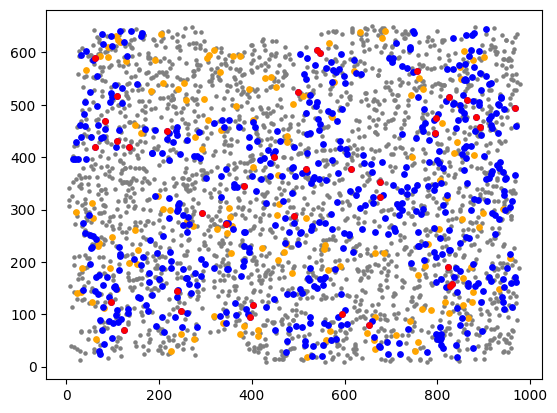

In [1635]:
#visualization of DBSCAN clustering result
sample_id = '5fc_rep_1'
source_ct = 'Celltype2'
target_ct = 'Celltype4'

l_gene = 'ANGPT1'
r_gene = 'ITGA5'


#l_gene = 'ADM2'
#r_gene = 'RAMP1'


l_gene = 'ADM2'
r_gene = 'RAMP1'

l_gene = 'ANGPT1'
r_gene = 'ITGA5'
cluster_df = pd.DataFrame(np.load(datap+'output/clustering/'+sample_id+'_dbscan.cell.clusters.test.npy',allow_pickle=True))
#cluster_df = pd.DataFrame(np.load(datap+'output/clustering/starmap_dbscan.cell.clusters.test.npy',allow_pickle=True))

cluster_df.columns = ['cell_type','cell_idx']

meta_df_fov = pd.read_csv(datap+'data/simu_'+sample_id+'_meta_exp.csv.test',index_col=0)
#meta_df_fov = pd.read_csv(datap+'data/simu_5fc_starmap_meta_exp.csv',index_col=0)
meta_df_fov.index = range(meta_df_fov.shape[0])
cell_type_l = list(set(cluster_df['cell_type']))

meta_df_sel = meta_df_fov
X_sel = np.array(meta_df_sel[['x_pos','y_pos']])
plt.scatter(X_sel[:,0],X_sel[:,1],c = 'grey',s = 5)

tmp_ct = cluster_df[cluster_df['cell_type']==source_ct]
for n,line in enumerate(tmp_ct['cell_idx']):
    tmp_df = meta_df_fov.loc[line]
    tmp_df = tmp_df[tmp_df[l_gene]>0]
    X = np.array(tmp_df[['x_pos','y_pos']])
    plt.scatter(X[:,0],X[:,1],color ='orange',s = 15)
    
tmp_ct = cluster_df[cluster_df['cell_type']==target_ct]
for n,line in enumerate(tmp_ct['cell_idx']):
    tmp_df2 = meta_df_fov.loc[line]
    tmp_df2 = tmp_df2[tmp_df2[r_gene]>=0]
    X = np.array(tmp_df2[['x_pos','y_pos']])
    plt.scatter(X[:,0],X[:,1],color ='blue',s = 15)
    tmp_df2 = tmp_df2[tmp_df2[r_gene]>0]
    X = np.array(tmp_df2[['x_pos','y_pos']])
    plt.scatter(X[:,0],X[:,1],color ='red',s = 15)

#plt.savefig(datap+'example/output/Figs/'+group+'_fov_'+str(fov)+"_"+ct+".cluster.pdf", dpi=100, tansparent=True)
plt.show()

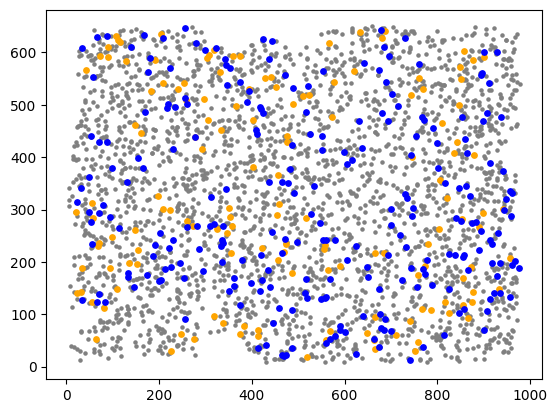

In [1633]:
#visualization of DBSCAN clustering result
sample_id = '5fc_rep_1'
source_ct = 'Celltype2'
target_ct = 'Celltype1'

l_gene = 'ANGPT1'
r_gene = 'ITGA5'


#l_gene = 'ADM2'
#r_gene = 'RAMP1'


l_gene = 'ADM2'
r_gene = 'RAMP1'

l_gene = 'ANGPT1'
r_gene = 'ITGA5'
cluster_df = pd.DataFrame(np.load(datap+'output/clustering/'+sample_id+'_dbscan.cell.clusters.test.npy',allow_pickle=True))
#cluster_df = pd.DataFrame(np.load(datap+'output/clustering/starmap_dbscan.cell.clusters.test.npy',allow_pickle=True))

cluster_df.columns = ['cell_type','cell_idx']

meta_df_fov = pd.read_csv(datap+'data/simu_'+sample_id+'_meta_exp.csv.test',index_col=0)
#meta_df_fov = pd.read_csv(datap+'data/simu_5fc_starmap_meta_exp.csv',index_col=0)
meta_df_fov.index = range(meta_df_fov.shape[0])
cell_type_l = list(set(cluster_df['cell_type']))

meta_df_sel = meta_df_fov
X_sel = np.array(meta_df_sel[['x_pos','y_pos']])
plt.scatter(X_sel[:,0],X_sel[:,1],c = 'grey',s = 5)

tmp_ct = cluster_df[cluster_df['cell_type']==source_ct]
for n,line in enumerate(tmp_ct['cell_idx']):
    tmp_df = meta_df_fov.loc[line]
    tmp_df = tmp_df[tmp_df[l_gene]>0]
    X = np.array(tmp_df[['x_pos','y_pos']])
    plt.scatter(X[:,0],X[:,1],color ='orange',s = 15)
    
tmp_ct = cluster_df[cluster_df['cell_type']==target_ct]
for n,line in enumerate(tmp_ct['cell_idx']):
    tmp_df2 = meta_df_fov.loc[line]
    tmp_df2 = tmp_df2[tmp_df2[r_gene]>0]
    X = np.array(tmp_df2[['x_pos','y_pos']])
    plt.scatter(X[:,0],X[:,1],color ='blue',s = 15)

#plt.savefig(datap+'example/output/Figs/'+group+'_fov_'+str(fov)+"_"+ct+".cluster.pdf", dpi=100, tansparent=True)
plt.show()

In [267]:
tmp_df

,x_pos,y_pos,region_label,annotation,ADM2,ANGPT1,ANGPT2,ANGPT4,ANGPTL1,ANXA1,...,TNFRSF21,SELL,ITGB5,FZD7,FZD1,FZD5,RYK,FZD4,FZD6,ROR1
2530,942.10213,40.527622,Region1,Celltype1,3,5,0,0,0,5,...,0,0,0,1,0,0,0,0,0,0
2833,945.04391,78.248857,Region1,Celltype1,1,5,0,5,0,5,...,0,0,0,0,0,0,0,0,0,0


In [1036]:
def sel_pot_inter_cluster_pairs(S_all_arr,cluster_cell_df,dist_cutoff=50):
    
    S_all_arr_new = np.zeros_like(S_all_arr)
    S_all_arr_new[:] = np.inf
    anno_t = list(set(cluster_cell_df['cell_type']))
    #print(anno_t)
    for l_cell_type in anno_t:
        for r_cell_type in anno_t:
            l_cell_clusters_df = cluster_cell_df[cluster_cell_df['cell_type']==l_cell_type]
            r_cell_clusters_df = cluster_cell_df[cluster_cell_df['cell_type']==r_cell_type]
            for j in range(l_cell_clusters_df.shape[0]):
                for k in range(r_cell_clusters_df.shape[0]):
                    #if j!=k or l_cell_type != r_cell_type:
                    l_cell_ids_index = np.array(l_cell_clusters_df.iloc[j]['cell_idx'])
                    r_cell_ids_index = np.array(r_cell_clusters_df.iloc[k]['cell_idx'])

                    dis_mtx = S_all_arr[l_cell_ids_index,:][:,r_cell_ids_index]
                    #make sure cell clusters are spatially proximal to each other
                    #(at least one cell-cell pair that is within the dist_cutoff)
                    mask_close = np.where(dis_mtx<=dist_cutoff)
                    if dis_mtx[mask_close].shape[0] >= 1:
                        #print(l_cell_type,r_cell_type)
                        S_all_arr_new[l_cell_ids_index[:,None], r_cell_ids_index] = S_all_arr[l_cell_ids_index[:,None], r_cell_ids_index]
    return S_all_arr_new

In [1158]:
#ot
meta_df_fov = pd.read_csv(datap+'data/simu_'+name_tmp+'_meta_exp.csv',index_col=0)
#meta_df_fov = pd.read_csv(datap+'data/simu_5fc_starmap_meta_exp.csv',index_col=0)
exp_df_norm = meta_df_fov.iloc[:,4:]
exp_df_norm = exp_df_norm[exp_df_norm>0]
df_quantile = exp_df_norm.quantile(q=0.99,axis = 0) 
known_lr_pairs = pd.read_csv(datap+'data/cosmx_LR_dat.csv',index_col=None).iloc[:,:2]
known_lr_pairs = pd.read_csv(datap+'data/cosmx_LR_dat_random.csv',index_col=None).iloc[:,:2]
#known_lr_pairs = pd.read_csv(datap+'data/starmap_LR_dat.csv',index_col=None).iloc[:,:2]
known_lr_pairs.columns = ['l_gene','r_gene']

cluster_df = pd.DataFrame(np.load(datap+'output/clustering/'+name_tmp+'_dbscan.cell.clusters.test.npy',allow_pickle=True))
#cluster_df = pd.DataFrame(np.load(datap+'output/clustering/starmap_dbscan.cell.clusters.test.npy',allow_pickle=True))

cluster_df.columns = ['cell_type','cell_idx']

#coordinates
meta_df_fov.index = range(meta_df_fov.shape[0])
cell_id_all = np.array(range(meta_df_fov.shape[0]))
coord = np.array(meta_df_fov[['x_pos','y_pos']])
S_all_arr = distance_matrix(coord,coord)

#expression
exp_df_fov = meta_df_fov.iloc[:,4:]
exp_df_fov = exp_df_fov/df_quantile
exp_df_fov[exp_df_fov>1]=1
exp_df_fov.index = cell_id_all

#select potentially communicating cell cluster pairs (spatially adjacent)
S_all_arr_new = sel_pot_inter_cluster_pairs(S_all_arr,cluster_df)

#optimal transport between source and target cells
ga_df_final = scotia.source_target_ot(S_all_arr_new, exp_df_fov, meta_df_fov, known_lr_pairs)
if ga_df_final.shape[0]>0:
    ga_df_final.columns = ['source_cell_idx','receptor_cell_idx','likelihood','ligand_recptor','source_cell_type','target_cell_type']
    ga_df_final.to_csv(datap+'output/ot/'+name_tmp+'_test.ot.csv',header = True, index = False, sep = "\t")
    #ga_df_final.to_csv(datap+'output/ot/starmap.ot.csv',header = True, index = False, sep = "\t")

    #post-processing of ot results by calculating averaged likelihoods
    ga_df_final['cell_pairs'] = ga_df_final['source_cell_type']+"_"+ga_df_final['target_cell_type']
    final_summary = scotia.post_ot(ga_df_final,label='test')
    final_summary.to_csv(datap+'output/ot/summary/'+name_tmp+'_test.ot.csv',header = True, index = False, sep = "\t")
    #final_summary.to_csv(datap+'output/ot/summary/starmap.ot.csv',header = True, index = False, sep = "\t")



In [1156]:
#prepare shuffled data for permutation test  #default
it_n = 50
meta_df_fov = pd.read_csv(datap+'data/simu_'+name_tmp+'_meta_exp.csv',index_col=0)
#meta_df_fov = pd.read_csv(datap+'data/simu_5fc_starmap_meta_exp.csv',index_col=0)
meta_df_fov.index = range(meta_df_fov.shape[0])
cell_id_all = np.array(range(meta_df_fov.shape[0]))
coord = np.array(meta_df_fov[['x_pos','y_pos']])
S_all_arr = distance_matrix(coord,coord)

#get permutated positions and expression
random_pos, shuffled_exp = scotia.permutation_test(coord,int(it_n))
random_pos.to_csv(datap+'output/permutation/'+name_tmp+'_test_shuffled_pos.csv')
shuffled_exp.to_csv(datap+'output/permutation/'+name_tmp+'_test_shuffled_exp.csv')

#random_pos.to_csv(datap+'output/permutation/starmap_shuffled_pos.csv')
#shuffled_exp.to_csv(datap+'output/permutation/starmap_shuffled_exp.csv')

In [1157]:
#prepare shuffled data for permutation test  #within cell type
it_n = 50
meta_df_fov = pd.read_csv(datap+'data/simu_'+name_tmp+'_meta_exp.csv',index_col=0)
#meta_df_fov = pd.read_csv(datap+'data/simu_5fc_starmap_meta_exp.csv',index_col=0)
meta_df_fov.index = range(meta_df_fov.shape[0])
cell_id_all = np.array(range(meta_df_fov.shape[0]))


shuffle_idx = []
for it_i in range(it_n):
    df_tmp =  meta_df_fov[['annotation']]
    df_tmp['new_idx'] = [np.nan for x in df_tmp.index]
    for c_t in np.unique(meta_df_fov['annotation']):
        df_sel_idx = list(df_tmp[df_tmp['annotation']==c_t].index)
        shuffle(df_sel_idx)
        df_tmp.loc[df_tmp['annotation']==c_t,'new_idx'] = df_sel_idx
    shuffle_idx.append([int(x) for x in df_tmp['new_idx']])
shuffle_idx_df = pd.DataFrame(shuffle_idx).T
shuffle_idx_df.to_csv(datap+'output/permutation/'+name_tmp+'_test_shuffled_exp_within_ct.csv')

In [668]:
#run permutation
meta_df_fov = pd.read_csv(datap+'data/simu_5fc_meta_exp.csv',index_col=0)
#meta_df_fov = pd.read_csv(datap+'data/simu_5fc_starmap_meta_exp.csv',index_col=0)
exp_df_norm = meta_df_fov.iloc[:,4:]
exp_df_norm = exp_df_norm[exp_df_norm>0]
df_quantile = exp_df_norm.quantile(q=0.99,axis = 0) 
known_lr_pairs = pd.read_csv(datap+'data/cosmx_LR_dat.csv',index_col=None).iloc[:,:2]
#known_lr_pairs = pd.read_csv(datap+'data/starmap_LR_dat.csv',index_col=None).iloc[:,:2]
known_lr_pairs.columns = ['l_gene','r_gene']

cluster_df = pd.DataFrame(np.load(datap+'output/clustering/dbscan.cell.clusters.test.npy',allow_pickle=True))
#cluster_df = pd.DataFrame(np.load(datap+'output/clustering/starmap_dbscan.cell.clusters.test.npy',allow_pickle=True))
cluster_df.columns = ['cell_type','cell_idx']

#coordinates
meta_df_fov.index = range(meta_df_fov.shape[0])
cell_id_all = np.array(range(meta_df_fov.shape[0]))
coord = np.array(meta_df_fov[['x_pos','y_pos']])
S_all_arr = distance_matrix(coord,coord)

#expression
exp_df_fov = meta_df_fov.iloc[:,4:]
exp_df_fov = exp_df_fov/df_quantile
exp_df_fov[exp_df_fov>1] = 1
exp_df_fov.index = cell_id_all

#get permutated positions and expression
random_pos = pd.read_csv(datap+'output/permutation/test_shuffled_pos.csv',index_col=0)
shuffled_exp = pd.read_csv(datap+'output/permutation/test_shuffled_exp.csv',index_col=0)

#random_pos = pd.read_csv(datap+'output/permutation/starmap_shuffled_pos.csv',index_col=0)
#shuffled_exp = pd.read_csv(datap+'output/permutation/starmap_shuffled_exp.csv',index_col=0)

#select potentially communicating cell cluster pairs (spatially adjacent)
S_all_arr_new = sel_pot_inter_cluster_pairs(S_all_arr,cluster_df)

final_summary = pd.DataFrame([])
for i_n in range(int(it_n)):
    exp_df_permu = exp_df_fov.loc[list(shuffled_exp.iloc[:,i_n])]
    coord_permu = np.array(random_pos.iloc[:,i_n*2:i_n*2+2])
    S_all_arr_permu = distance_matrix(coord_permu,coord_permu)
    mask = np.where(S_all_arr_new==np.inf)
    S_all_arr_permu[mask] = np.inf
    S_all_arr_permu = S_all_arr_permu

    #optimal transport
    ga_df_permu = scotia.source_target_ot(S_all_arr_permu, exp_df_permu, meta_df_fov, known_lr_pairs)

    if ga_df_permu.shape[0]>0:
        ga_df_permu.columns = ['source_cell_idx','receptor_cell_idx','likelihood','ligand_recptor','source_cell_type','target_cell_type']
        ga_df_permu.to_csv(datap+'output/permutation/test.permu'+str(i_n)+'.csv',header = True, index = False, sep = "\t")
        #ga_df_permu.to_csv(datap+'output/permutation/starmap.permu'+str(i_n)+'.csv',header = True, index = False, sep = "\t")


        #post-processing ot results by calculating averaged likelihoods
        ga_df_permu['cell_pairs'] = ga_df_permu['source_cell_type']+"_"+ga_df_permu['target_cell_type']
        final_summary_tmp = scotia.post_ot(ga_df_permu, label='test', it_n_label = i_n)
        final_summary = pd.concat([final_summary,final_summary_tmp])

final_summary.to_csv(datap+'output/permutation/summary/test.permu.csv',header = True, index = False, sep = "\t")
#final_summary.to_csv(datap+'output/permutation/summary/starmap.permu.csv',header = True, index = False, sep = "\t")


In [1162]:
#sample_type = '_within_ct'
sample_type = '_only_exp'
#sample_type = ''
name_tmp = '10fc_no_ref_zero0.1'
final_summary = pd.DataFrame([])
for i_n in range(int(it_n)):
    final_summary_tmp = pd.read_csv(datap+'output/permutation/summary/'+name_tmp+'_test.permu.'+str(i_n)+sample_type+'.csv',header = 0,sep = "\t")
    
    if final_summary.shape[0]>0:
        final_summary = pd.concat([final_summary,final_summary_tmp])
    else:
        final_summary = final_summary_tmp
if sample_type == '':
    final_summary.to_csv(datap+'output/permutation/summary/'+name_tmp+'_test.permu.'+sample_type[1:]+'csv',header = True, index = False, sep = "\t")
else:
    final_summary.to_csv(datap+'output/permutation/summary/'+name_tmp+'_test.permu.'+sample_type[1:]+'.csv',header = True, index = False, sep = "\t")
    

In [821]:
def read_data(file):
    try:
        df = pd.read_csv(file, header = 0, index_col=None, sep = "\t")
    except:
        df = pd.DataFrame()
    return df

In [1171]:
it_n = 50
sample_type = ''
sample_type = 'within_ct.'
sample_type = 'only_exp.'

#name_tmp = '5fc_no_ref'
#name_tmp = '5fc_no_ref_zero0.8'
#name_tmp = '1fc_no_ref_zero0.8'
#name_tmp = '1fc_no_ref_zero0.1'
#name_tmp = '10fc_no_ref_zero0.8'
#name_tmp = '10fc'
name_tmp = '10fc_no_ref_zero0.1'
df_ot = pd.DataFrame([])
df_permu = pd.DataFrame([])

compare_dic ={}

meta_df_fov = pd.read_csv(datap+'data/simu_'+name_tmp+'_meta_exp.csv',index_col=0)
#meta_df_fov = pd.read_csv(datap+'data/simu_5fc_starmap_meta_exp.csv',index_col=0)

for c_t_1 in set(meta_df_fov['annotation']):
    for c_t_2 in set(meta_df_fov['annotation']):
        #import ot result
        df_ot = read_data(datap+'output/ot/summary/'+name_tmp+'_test.ot.csv')#final 
        #df_ot = read_data(datap+'output/ot/summary/starmap.ot.csv')#final 
   
        #import permutation result
        #df_permu = read_data(datap+'output/permutation/summary/'+name_tmp+'_test.permu.csv')
        df_permu = read_data(datap+'output/permutation/summary/'+name_tmp+'_test.permu.'+sample_type+'csv')
        #df_permu = read_data(datap+'output/permutation/summary/'+name_tmp+'_test.permu.within_ct.csv')
        #df_permu = read_data(datap+'output/permutation/summary/starmap.permu.csv')
        
        df_ot['lr_pairs'] = [x.split('|')[0] for x in df_ot['label']]
        df_ot['cell_pairs'] = [x.split('|')[2] for x in df_ot['label']]  

        df_permu['it_n'] = [x.split('|')[-1] for x in df_permu['label']]
        df_permu['lr_pairs'] = [x.split('|')[0] for x in df_permu['label']]
        df_permu['label_new'] = df_permu['lr_pairs']+"|"+df_permu['it_n'].map(str)
        df_permu['cell_pairs'] = [x.split('|')[2] for x in df_permu['label']]


        c_t_p = c_t_1+"_"+c_t_2
        df_ot_tmp = df_ot[df_ot['cell_pairs'] == c_t_p]
        df_permu_tmp = df_permu[df_permu['cell_pairs'] == c_t_p]

        if df_permu_tmp.shape[0]>0:
            df_ot_groupby = df_ot_tmp.groupby(['label'])['ave_likelihood'].sum().to_frame().reset_index()
            df_ot_groupby.index = [x.split('|')[0] for x in df_ot_groupby['label']]
            df_permu_groupby = df_permu_tmp.groupby(['label_new'])['ave_likelihood'].sum()

            for i in df_ot_groupby.index:
                compare_dic[i+"|"+sample_id+"|"+c_t_p] = 0
                df_permu_groupby_sel = df_permu_groupby[df_permu_groupby.index.str.contains(i+"\|")]
                for j in df_permu_groupby_sel:
                    if j > df_ot_groupby.loc[i,'ave_likelihood']:
                        compare_dic[i+"|"+sample_id+"|"+c_t_p] += 1/it_n

        p_l = [round(x,3) for x in compare_dic.values()]
        pvalue_adj = multipletests(p_l, alpha=0.05, method='fdr_bh')[1]
        pvalue_adj = [round(x,3) for x in pvalue_adj]
        
permu_sum_df = pd.DataFrame({'sample_id': compare_dic.keys(),'permu_pvalue': compare_dic.values(),'adj_permu_pvalue':pvalue_adj})
#permu_sum_df.to_csv(datap+'output/'+name_tmp+"_permut.csv")
#permu_sum_df.to_csv(datap+'output/'+name_tmp+"_permut.within_ct.csv")
permu_sum_df.to_csv(datap+'output/'+name_tmp+"_permut."+sample_type+".csv")

In [1172]:
#sample_type = 'within_ct.'
#sample_type = 'only_exp.'
#sample_type = ''
#name_tmp = '5fc_no_ref'
if 'no_ref' in name_tmp:
    ground_truth_df = pd.read_csv(datap+'data/cosmx_LR_dat_random.csv',index_col=None)
else:
    ground_truth_df = pd.read_csv(datap+'data/cosmx_LR_dat.csv',index_col=None)
#permu_sum_df = pd.read_csv(datap+'output/'+name_tmp+"_permut.csv",index_col=0)
#permu_sum_df = pd.read_csv(datap+'output/'+name_tmp+"_permut.within_ct.csv",index_col=0)
permu_sum_df = pd.read_csv(datap+'output/'+name_tmp+"_permut."+sample_type+".csv",index_col=0)
permu_sum_df['label'] = [x.split("|")[0]+"_"+x.split("|")[2] for x in permu_sum_df['sample_id']]
permu_sum_df = permu_sum_df[permu_sum_df['permu_pvalue']<0.05]
pred_pos = list(permu_sum_df['label'])
true_pos = list(ground_truth_df.iloc[:,0]+ "_"+ground_truth_df.iloc[:,1]+ "_"+ground_truth_df.iloc[:,2]+ "_"+ground_truth_df.iloc[:,3])

In [1173]:
true_neg = []
for x in range(ground_truth_df.shape[0]):
    for ct1 in set(meta_df_fov['annotation']):
        for ct2 in set(meta_df_fov['annotation']):
            if ct1+"_"+ct2 != ground_truth_df.iloc[x,2]+"_"+ground_truth_df.iloc[x,3]:
                true_neg.append(ground_truth_df.iloc[x,0]+"_"+ground_truth_df.iloc[x,1]+"_"+ct1+"_"+ct2)
tp = len([x for x in pred_pos if x in true_pos])
tn = len([x for x in true_neg if x not in pred_pos])
fp = len([x for x in pred_pos if x not in true_neg])
fn = len([x for x in true_pos if x  not in pred_pos])
f_score = 2*tp/(2*tp+fp+fn)

In [1166]:
#permutation
print(tp/(tp+fn))
print(tn/(tn+fp))

0.35545023696682465
0.9744506898313745


In [1170]:
#within ct
print(tp/(tp+fn))
print(tn/(tn+fp))

0.4881516587677725
0.9649122807017544


In [1174]:
#exp only
print(tp/(tp+fn))
print(tn/(tn+fp))

0.6469194312796208
0.9506418369191828


In [504]:
df_ot[df_ot['lr_pairs']=='ADM2_RAMP1']

,label,ave_likelihood,lr_pairs,cell_pairs
47,ADM2_RAMP1|test|Celltype1_Celltype1,0.142630,ADM2_RAMP1,Celltype1_Celltype1
2481,ADM2_RAMP1|test|Celltype4_Celltype1,0.091392,ADM2_RAMP1,Celltype4_Celltype1
3300,ADM2_RAMP1|test|Celltype2_Celltype1,0.054098,ADM2_RAMP1,Celltype2_Celltype1


# summary all

In [1719]:
sample_l = []
for fc in [1,2,3,4,5,6,7,8,9,10]:
#for fc in [2,4,6,7,8,9]:
    #for rep in [1,2,3]:
    for rep in [1,2,3,4,5]:
        #sample_l.append(str(fc)+"fc_rep_"+str(rep))
        #sample_l.append(str(fc)+"fc_rep_"+str(rep)+'_8ct')
        for ratio in [0.1]:
            #sample_l.append(str(fc)+"fc_no_ref_zero"+str(ratio)+"_rep_"+str(rep))
            sample_l.append(str(fc)+"fc_no_ref_zero"+str(ratio)+"_rep_"+str(rep)+"_8ct")

In [1706]:
#summary 
sample_l = []
for fc in [1,2,3,4,5,6,7,8,9,10]:
#for fc in [2,4,6,7,8,9]:
    #for rep in [1,2,3]:
    for rep in [1,2,3,4,5,6,7,8,9,10]:
        #sample_l.append(str(fc)+"fc_rep_"+str(rep))
        #sample_l.append(str(fc)+"fc_rep_"+str(rep)+'_8ct')
        for ratio in [0.1]:
            #sample_l.append(str(fc)+"fc_no_ref_zero"+str(ratio)+"_rep_"+str(rep))
            sample_l.append(str(fc)+"fc_no_ref_zero"+str(ratio)+"_rep_"+str(rep)+"_8ct")
for sample_id in sample_l:
    meta_df = pd.read_csv(datap+'data/simu_'+sample_id+'_meta.csv',index_col=0)
    meta_df.columns = ['x_pos','y_pos','region_label','annotation']
    
    count_df = pd.read_csv(datap+'data/simu_'+sample_id+'_counts.csv',index_col=0)


    meta_df.index = count_df.index
    df_summary = meta_df.join(count_df)
    df_summary.to_csv(datap+'data/simu_'+sample_id+'_meta_exp.csv')

In [1182]:
"""
#DBSCAN
for sample_id in sample_l[:1]:
    celltype = []
    cell_idx = []
    meta_df_fov = pd.read_csv(datap+'data/simu_'+sample_id+'_meta_exp.csv',index_col=0)
    #meta_df_fov = pd.read_csv(datap+'data/simu_5fc_starmap_meta_exp.csv',index_col=0)
    meta_df_fov['index'] = range(meta_df_fov.shape[0])

    cell_type_l = list(set(meta_df_fov['annotation']))
    for ct in cell_type_l:
        ###cluster cells
        #print(ct)
        meta_df_sel = meta_df_fov[meta_df_fov['annotation']==ct]
        X = np.array(meta_df_sel[['x_pos','y_pos']])
        if X.shape[0] >= 5:
            print(ct)
            idx_l, fi_eps = scotia.dbscan_ff_cell(X, X_index_arr=np.array(meta_df_sel['index'])) 
            if len(idx_l)>0:
                celltype += [ct for x in idx_l]
                cell_idx += idx_l
    tmp_df = pd.DataFrame([celltype,cell_idx]).T
    np.save(datap+'output/clustering/'+sample_id+'_dbscan.cell.clusters.test',tmp_df)
"""

Celltype4
eps: 35
Celltype2
eps: 40
Celltype1
eps: 35
Celltype3
eps: 35


In [1721]:
print(len(sample_l))
for sample_id in sample_l:
    print(sample_id)

50
1fc_no_ref_zero0.1_rep_1_8ct
1fc_no_ref_zero0.1_rep_2_8ct
1fc_no_ref_zero0.1_rep_3_8ct
1fc_no_ref_zero0.1_rep_4_8ct
1fc_no_ref_zero0.1_rep_5_8ct
2fc_no_ref_zero0.1_rep_1_8ct
2fc_no_ref_zero0.1_rep_2_8ct
2fc_no_ref_zero0.1_rep_3_8ct
2fc_no_ref_zero0.1_rep_4_8ct
2fc_no_ref_zero0.1_rep_5_8ct
3fc_no_ref_zero0.1_rep_1_8ct
3fc_no_ref_zero0.1_rep_2_8ct
3fc_no_ref_zero0.1_rep_3_8ct
3fc_no_ref_zero0.1_rep_4_8ct
3fc_no_ref_zero0.1_rep_5_8ct
4fc_no_ref_zero0.1_rep_1_8ct
4fc_no_ref_zero0.1_rep_2_8ct
4fc_no_ref_zero0.1_rep_3_8ct
4fc_no_ref_zero0.1_rep_4_8ct
4fc_no_ref_zero0.1_rep_5_8ct
5fc_no_ref_zero0.1_rep_1_8ct
5fc_no_ref_zero0.1_rep_2_8ct
5fc_no_ref_zero0.1_rep_3_8ct
5fc_no_ref_zero0.1_rep_4_8ct
5fc_no_ref_zero0.1_rep_5_8ct
6fc_no_ref_zero0.1_rep_1_8ct
6fc_no_ref_zero0.1_rep_2_8ct
6fc_no_ref_zero0.1_rep_3_8ct
6fc_no_ref_zero0.1_rep_4_8ct
6fc_no_ref_zero0.1_rep_5_8ct
7fc_no_ref_zero0.1_rep_1_8ct
7fc_no_ref_zero0.1_rep_2_8ct
7fc_no_ref_zero0.1_rep_3_8ct
7fc_no_ref_zero0.1_rep_4_8ct
7fc_no_ref_

In [1708]:
#permu ori
#for sample_id in sample_l:
for sample_id in sample_l:

    #prepare shuffled data for permutation test  #default
    it_n = 50
    meta_df_fov = pd.read_csv(datap+'data/simu_'+sample_id+'_meta_exp.csv',index_col=0)
    meta_df_fov.index = range(meta_df_fov.shape[0])
    cell_id_all = np.array(range(meta_df_fov.shape[0]))
    coord = np.array(meta_df_fov[['x_pos','y_pos']])
    S_all_arr = distance_matrix(coord,coord)

    #get permutated positions and expression
    random_pos, shuffled_exp = scotia.permutation_test(coord,int(it_n))
    random_pos.to_csv(datap+'output/permutation/'+sample_id+'_test_shuffled_pos.csv')
    shuffled_exp.to_csv(datap+'output/permutation/'+sample_id+'_test_shuffled_exp.csv')

#permu within ct
    it_n = 50
    meta_df_fov = pd.read_csv(datap+'data/simu_'+sample_id+'_meta_exp.csv',index_col=0)
    meta_df_fov.index = range(meta_df_fov.shape[0])
    cell_id_all = np.array(range(meta_df_fov.shape[0]))


    shuffle_idx = []
    for it_i in range(it_n):
        df_tmp =  meta_df_fov[['annotation']]
        df_tmp['new_idx'] = [np.nan for x in df_tmp.index]
        for c_t in np.unique(meta_df_fov['annotation']):
            df_sel_idx = list(df_tmp[df_tmp['annotation']==c_t].index)
            shuffle(df_sel_idx)
            df_tmp.loc[df_tmp['annotation']==c_t,'new_idx'] = df_sel_idx
        shuffle_idx.append([int(x) for x in df_tmp['new_idx']])
    shuffle_idx_df = pd.DataFrame(shuffle_idx).T
    shuffle_idx_df.to_csv(datap+'output/permutation/'+sample_id+'_test_shuffled_exp_within_ct.csv')

# after permutation

In [1670]:
#summarize permutation results
#for sample_id in sample_l:
#for sample_id in ['7fc_rep_1','7fc_rep_2','7fc_rep_3']:
#for sample_id in ['1fc_no_ref_zero0.8_rep_1','1fc_no_ref_zero0.8_rep_2','1fc_no_ref_zero0.8_rep_3','5fc_no_ref_zero0.8_rep_1','5fc_no_ref_zero0.8_rep_2','5fc_no_ref_zero0.8_rep_3','10fc_no_ref_zero0.8_rep_1','10fc_no_ref_zero0.8_rep_2','10fc_no_ref_zero0.8_rep_3']:
#for sample_id in ['1fc_rep_1','1fc_rep_2','1fc_rep_3']:
#for sample_id in ['1fc_rep_1_8ct','1fc_rep_2_8ct','1fc_rep_3_8ct','3fc_rep_1_8ct','3fc_rep_2_8ct','3fc_rep_3_8ct','5fc_rep_1_8ct','5fc_rep_2_8ct','5fc_rep_3_8ct','7fc_rep_1_8ct','7fc_rep_2_8ct','7fc_rep_3_8ct','10fc_rep_1_8ct','10fc_rep_2_8ct','10fc_rep_3_8ct']:
#for sample_id in ['10fc_rep_1_8ct','10fc_rep_2_8ct','10fc_rep_3_8ct']:
for sample_id in ['4fc_rep_1']:

    print(sample_id)
    final_summary = pd.DataFrame([])
    for i_n in range(int(it_n)):
        final_summary_tmp = pd.read_csv(datap+'output/permutation/summary/'+sample_id+'_test.permu.'+str(i_n)+'.csv',header = 0,sep = "\t")

        if final_summary.shape[0]>0:
            final_summary = pd.concat([final_summary,final_summary_tmp])
        else:
            final_summary = final_summary_tmp
    
        final_summary.to_csv(datap+'output/permutation/summary/'+sample_id+'_test.permu.default.csv',header = True, index = False, sep = "\t")
        
    final_summary = pd.DataFrame([])

    for i_n in range(int(it_n)):
        final_summary_tmp = pd.read_csv(datap+'output/permutation/summary/'+sample_id+'_test.permu.'+str(i_n)+'_within_ct.csv',header = 0,sep = "\t")

        if final_summary.shape[0]>0:
            final_summary = pd.concat([final_summary,final_summary_tmp])
        else:
            final_summary = final_summary_tmp
    
        final_summary.to_csv(datap+'output/permutation/summary/'+sample_id+'_test.permu.within_ct.csv',header = True, index = False, sep = "\t")

    final_summary = pd.DataFrame([])
    for i_n in range(int(it_n)):
        final_summary_tmp = pd.read_csv(datap+'output/permutation/summary/'+sample_id+'_test.permu.'+str(i_n)+'_only_exp.csv',header = 0,sep = "\t")

        if final_summary.shape[0]>0:
            final_summary = pd.concat([final_summary,final_summary_tmp])
        else:
            final_summary = final_summary_tmp
    
        final_summary.to_csv(datap+'output/permutation/summary/'+sample_id+'_test.permu.only_exp.csv',header = True, index = False, sep = "\t")


4fc_rep_1


'\n    for i_n in range(int(it_n)):\n        final_summary_tmp = pd.read_csv(datap+\'output/permutation/summary/\'+sample_id+\'_test.permu.\'+str(i_n)+\'_within_ct.csv\',header = 0,sep = "\t")\n\n        if final_summary.shape[0]>0:\n            final_summary = pd.concat([final_summary,final_summary_tmp])\n        else:\n            final_summary = final_summary_tmp\n    \n        final_summary.to_csv(datap+\'output/permutation/summary/\'+sample_id+\'_test.permu.within_ct.csv\',header = True, index = False, sep = "\t")\n\n    final_summary = pd.DataFrame([])\n    for i_n in range(int(it_n)):\n        final_summary_tmp = pd.read_csv(datap+\'output/permutation/summary/\'+sample_id+\'_test.permu.\'+str(i_n)+\'_only_exp.csv\',header = 0,sep = "\t")\n\n        if final_summary.shape[0]>0:\n            final_summary = pd.concat([final_summary,final_summary_tmp])\n        else:\n            final_summary = final_summary_tmp\n    \n        final_summary.to_csv(datap+\'output/permutation/summar

In [1681]:
it_n = 50
#for for sample_id in sample_l:
#for sample_id in ['3fc_rep_1','3fc_rep_2','3fc_rep_3','7fc_rep_1','7fc_rep_2','7fc_rep_3']:
#for sample_id in ['1fc_no_ref_zero0.1_rep_1','1fc_no_ref_zero0.1_rep_2','1fc_no_ref_zero0.1_rep_3','5fc_no_ref_zero0.1_rep_1','5fc_no_ref_zero0.1_rep_2','5fc_no_ref_zero0.1_rep_3','10fc_no_ref_zero0.1_rep_1','10fc_no_ref_zero0.1_rep_2','10fc_no_ref_zero0.1_rep_3']:
#for sample_id in ['1fc_no_ref_zero0.8_rep_1','1fc_no_ref_zero0.8_rep_2','1fc_no_ref_zero0.8_rep_3','5fc_no_ref_zero0.8_rep_1','5fc_no_ref_zero0.8_rep_2','5fc_no_ref_zero0.8_rep_3','10fc_no_ref_zero0.8_rep_1','10fc_no_ref_zero0.8_rep_2','10fc_no_ref_zero0.8_rep_3']:
#for sample_id in ['1fc_rep_1_8ct','1fc_rep_2_8ct','1fc_rep_3_8ct','3fc_rep_1_8ct','3fc_rep_2_8ct','3fc_rep_3_8ct','5fc_rep_1_8ct','5fc_rep_2_8ct','5fc_rep_3_8ct','7fc_rep_1_8ct','7fc_rep_2_8ct','7fc_rep_3_8ct','10fc_rep_1_8ct','10fc_rep_2_8ct','10fc_rep_3_8ct']:
for sample_id in ['4fc_rep_1']:
    print(sample_id)
    for compared_type in ['default','only_exp','within_ct']:
    #for compared_type in ['default']:
        df_ot = pd.DataFrame([])
        df_permu = pd.DataFrame([])

        compare_dic ={}

        meta_df_fov = pd.read_csv(datap+'data/simu_'+sample_id+'_meta_exp.csv',index_col=0)
        #meta_df_fov = pd.read_csv(datap+'data/simu_5fc_starmap_meta_exp.csv',index_col=0)

        
        #import ot result
        df_ot = read_data(datap+'output/ot/summary/'+sample_id+'_test.ot.csv')#final 

        #import permutation result
        df_permu = read_data(datap+'output/permutation/summary/'+sample_id+'_test.permu.'+compared_type+'.csv')


        df_ot['lr_pairs'] = [x.split('|')[0] for x in df_ot['label']]
        df_ot['cell_pairs'] = [x.split('|')[2] for x in df_ot['label']]  

        df_permu['it_n'] = [x.split('|')[-1] for x in df_permu['label']]
        df_permu['lr_pairs'] = [x.split('|')[0] for x in df_permu['label']]
        df_permu['label_new'] = df_permu['lr_pairs']+"|"+df_permu['it_n'].map(str)
        df_permu['cell_pairs'] = [x.split('|')[2] for x in df_permu['label']]

        for c_t_1 in set(meta_df_fov['annotation']):
            for c_t_2 in set(meta_df_fov['annotation']):
                c_t_p = c_t_1+"_"+c_t_2
                df_ot_tmp = df_ot[df_ot['cell_pairs'] == c_t_p]
                df_permu_tmp = df_permu[df_permu['cell_pairs'] == c_t_p]

                if df_permu_tmp.shape[0]>0:
                    df_ot_groupby = df_ot_tmp.groupby(['label'])['ave_likelihood'].sum().to_frame().reset_index()
                    df_ot_groupby.index = [x.split('|')[0] for x in df_ot_groupby['label']]
                    df_permu_groupby = df_permu_tmp.groupby(['label_new'])['ave_likelihood'].sum()

                    for i in df_ot_groupby.index:
                        compare_dic[i+"|"+sample_id+"|"+c_t_p] = 0
                        df_permu_groupby_sel = df_permu_groupby[df_permu_groupby.index.str.contains(i+"\|")]
                        for j in df_permu_groupby_sel:
                            if j > df_ot_groupby.loc[i,'ave_likelihood']:
                                compare_dic[i+"|"+sample_id+"|"+c_t_p] += 1/it_n

                p_l = [round(x,3) for x in compare_dic.values()]
                pvalue_adj = multipletests(p_l, alpha=0.05, method='fdr_bh')[1]
                pvalue_adj = [round(x,3) for x in pvalue_adj]

        permu_sum_df = pd.DataFrame({'sample_id': compare_dic.keys(),'permu_pvalue': compare_dic.values(),'adj_permu_pvalue':pvalue_adj})
        permu_sum_df.to_csv(datap+'output/'+sample_id+"_permut."+compared_type+".csv")

4fc_rep_1


In [928]:
sample_l = []
for fc in range(1,11):
#for fc in [1,2,4,6,8,9]:
    #for rep in [1,2,3]:
    for rep in range(1,6):
        #sample_l.append(str(fc)+"fc_rep_"+str(rep))
        #sample_l.append(str(fc)+"fc_rep_"+str(rep)+'_8ct')
        for ratio in [0.1]:
            #sample_l.append(str(fc)+"fc_no_ref_zero"+str(ratio)+"_rep_"+str(rep))
            sample_l.append(str(fc)+"fc_no_ref_zero"+str(ratio)+"_rep_"+str(rep)+"_8ct")
for i in sample_l:
    print(i)

1fc_no_ref_zero0.1_rep_1_8ct
1fc_no_ref_zero0.1_rep_2_8ct
1fc_no_ref_zero0.1_rep_3_8ct
1fc_no_ref_zero0.1_rep_4_8ct
1fc_no_ref_zero0.1_rep_5_8ct
2fc_no_ref_zero0.1_rep_1_8ct
2fc_no_ref_zero0.1_rep_2_8ct
2fc_no_ref_zero0.1_rep_3_8ct
2fc_no_ref_zero0.1_rep_4_8ct
2fc_no_ref_zero0.1_rep_5_8ct
3fc_no_ref_zero0.1_rep_1_8ct
3fc_no_ref_zero0.1_rep_2_8ct
3fc_no_ref_zero0.1_rep_3_8ct
3fc_no_ref_zero0.1_rep_4_8ct
3fc_no_ref_zero0.1_rep_5_8ct
4fc_no_ref_zero0.1_rep_1_8ct
4fc_no_ref_zero0.1_rep_2_8ct
4fc_no_ref_zero0.1_rep_3_8ct
4fc_no_ref_zero0.1_rep_4_8ct
4fc_no_ref_zero0.1_rep_5_8ct
5fc_no_ref_zero0.1_rep_1_8ct
5fc_no_ref_zero0.1_rep_2_8ct
5fc_no_ref_zero0.1_rep_3_8ct
5fc_no_ref_zero0.1_rep_4_8ct
5fc_no_ref_zero0.1_rep_5_8ct
6fc_no_ref_zero0.1_rep_1_8ct
6fc_no_ref_zero0.1_rep_2_8ct
6fc_no_ref_zero0.1_rep_3_8ct
6fc_no_ref_zero0.1_rep_4_8ct
6fc_no_ref_zero0.1_rep_5_8ct
7fc_no_ref_zero0.1_rep_1_8ct
7fc_no_ref_zero0.1_rep_2_8ct
7fc_no_ref_zero0.1_rep_3_8ct
7fc_no_ref_zero0.1_rep_4_8ct
7fc_no_ref_zer

In [1082]:
test_l = []
sen_l = []
spec_l = []
f_score = []
recall_l = []
pre_l = []
#for sample_id in ['1fc_rep_1','1fc_rep_2','1fc_rep_3','3fc_rep_1','3fc_rep_2','3fc_rep_3','5fc_rep_1','5fc_rep_2','5fc_rep_3','7fc_rep_1','7fc_rep_2','7fc_rep_3','10fc_rep_1','10fc_rep_2','10fc_rep_3']:
#for sample_id in ['1fc_no_ref_zero0.1_rep_1','1fc_no_ref_zero0.1_rep_2','1fc_no_ref_zero0.1_rep_3','5fc_no_ref_zero0.1_rep_1','5fc_no_ref_zero0.1_rep_2','5fc_no_ref_zero0.1_rep_3','10fc_no_ref_zero0.1_rep_1','10fc_no_ref_zero0.1_rep_2','10fc_no_ref_zero0.1_rep_3']:
#for sample_id in ['5fc_no_ref_zero0.1_rep_1','5fc_no_ref_zero0.1_rep_2','5fc_no_ref_zero0.1_rep_3']:

#for sample_id in ['1fc_no_ref_zero0.8_rep_1','1fc_no_ref_zero0.8_rep_2','1fc_no_ref_zero0.8_rep_3','5fc_no_ref_zero0.8_rep_1','5fc_no_ref_zero0.8_rep_2','5fc_no_ref_zero0.8_rep_3','10fc_no_ref_zero0.8_rep_1','10fc_no_ref_zero0.8_rep_2','10fc_no_ref_zero0.8_rep_3']:
#for sample_id in ['1fc_rep_1_8ct','1fc_rep_2_8ct','1fc_rep_3_8ct','3fc_rep_1_8ct','3fc_rep_2_8ct','3fc_rep_3_8ct','5fc_rep_1_8ct','5fc_rep_2_8ct','5fc_rep_3_8ct','7fc_rep_1_8ct','7fc_rep_2_8ct','7fc_rep_3_8ct','10fc_rep_1_8ct','10fc_rep_2_8ct','10fc_rep_3_8ct']:
for sample_id in ['5fc_rep_1','5fc_rep_2','5fc_rep_3']:
#for sample_id in sample_l:
    print(sample_id)
    #ground truth
    meta_df_fov = pd.read_csv(datap+'data/simu_'+sample_id+'_meta_exp.csv',index_col=0)
    if 'no_ref' in sample_id:
        if '8ct' not in sample_id:
            ground_truth_df = pd.read_csv(datap+'data/cosmx_LR_dat_random.csv',index_col=None)
        else:
            ground_truth_df = pd.read_csv(datap+'data/cosmx_LR_dat_random_8ct.csv',index_col=None)
           
    else:
        if '8ct' not in sample_id:
            ground_truth_df = pd.read_csv(datap+'data/cosmx_LR_dat.csv',index_col=None)
        else:
            ground_truth_df = pd.read_csv(datap+'data/cosmx_LR_dat_8ct.csv',index_col=None)
            
        
    true_pos = list(ground_truth_df.iloc[:,0]+ "_"+ground_truth_df.iloc[:,1]+ "_"+ground_truth_df.iloc[:,2]+ "_"+ground_truth_df.iloc[:,3])
    true_neg = []
    for x in range(ground_truth_df.shape[0]):
        for ct1 in set(meta_df_fov['annotation']):
            for ct2 in set(meta_df_fov['annotation']):
                if ct1+"_"+ct2 != ground_truth_df.iloc[x,2]+"_"+ground_truth_df.iloc[x,3]:
                    true_neg.append(ground_truth_df.iloc[x,0]+"_"+ground_truth_df.iloc[x,1]+"_"+ct1+"_"+ct2)
    

    for compared_type in ['default','only_exp','within_ct']:
    #for compared_type in ['default']:
        permu_sum_df = pd.read_csv(datap+'output/'+sample_id+"_permut."+compared_type+".csv",index_col=0)
        permu_sum_df['label'] = [x.split("|")[0]+"_"+x.split("|")[2] for x in permu_sum_df['sample_id']]
        permu_sum_df = permu_sum_df[permu_sum_df['permu_pvalue']<0.02]
        pred_pos = list(permu_sum_df['label'])
        tp = len([x for x in pred_pos if x in true_pos])
        tn = len([x for x in true_neg if x not in pred_pos])
        fp = len([x for x in pred_pos if x not in true_pos])
        fn = len([x for x in true_pos if x  not in pred_pos])
        f_score.append(2*tp/(2*tp+fp+fn))
        
        test_l.append(sample_id+"|"+compared_type)
        sen_l.append(tp/(tp+fn))
        spec_l.append(tn/(tn+fp))
        recall_l.append(tp/(tp+fn))
        pre_l.append(tp/(tp+fp))

5fc_rep_1
5fc_rep_2
5fc_rep_3


In [1083]:
fp

104

In [1084]:
tp

17

In [1085]:
17/(17+104)

0.14049586776859505

In [1081]:
54/(54+414)

0.11538461538461539

In [1069]:
40/(40+241)

0.1423487544483986

In [1077]:
28/(28+176)

0.13725490196078433

In [930]:
df_permu_summary = pd.DataFrame({'label':test_l,'Sensitivity':sen_l,'Specificity':spec_l,'F1 score':f_score,'Recall':recall_l,'Precision':pre_l})
df_permu_summary['label_2'] = [x.split("_")[0]+"|"+x.split("|")[1] for x in df_permu_summary['label']]
df_permu_summary['foldchange'] = [int(x.split("|")[0][:-2]) for x in df_permu_summary['label_2']]   
df_permu_summary['methods'] = [x.split("|")[1] for x in df_permu_summary['label_2']]
df_permu_summary
#df_permu_summary.to_csv(datap+'output/4ct_no_ref_zero0.8_3permu_result.txt')
#df_permu_summary.to_csv(datap+'output/8ct_no_ref_zero0.1_3permu_result.txt')
#df_permu_summary.to_csv(datap+'output/4ct_with_ref_3permu_result.txt')
#df_permu_summary.to_csv(datap+'output/8ct_with_ref_3permu_result.txt')

In [1157]:
df_permu_summary = pd.read_csv(datap+'output/8ct_with_ref_3permu_result.txt',index_col=0)
#df_permu_summary = pd.read_csv(datap+'output/8ct_no_ref_zero0.1_3permu_result.txt',index_col=0)
#df_permu_summary = pd.read_csv(datap+'output/4ct_no_ref_zero0.1_3permu_result.txt',index_col=0)
df_permu_summary = df_permu_summary[df_permu_summary['foldchange']<=7]

In [1158]:
title_name = '8 cell types'
#title_name = '8 cell types no reference (zero ratio 0.1)'
#tile_name2 = '8ct_no_ref_zero0.1'
tile_name2 = '8ct'


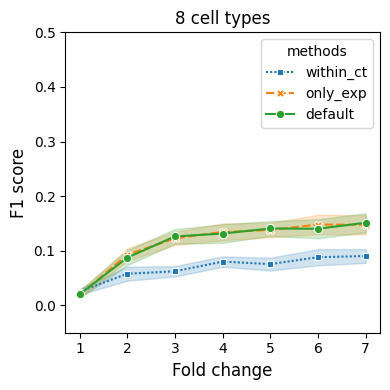

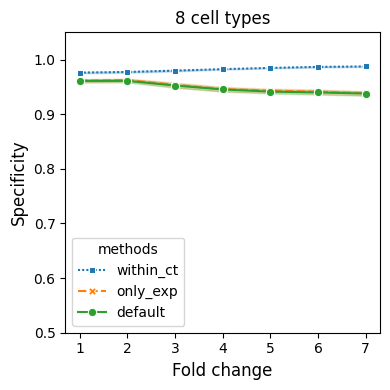

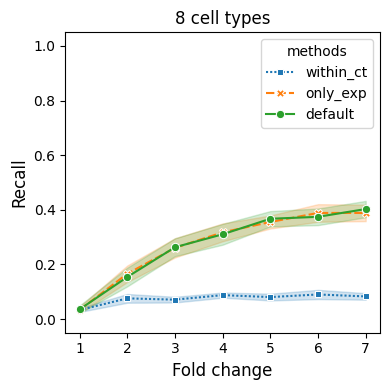

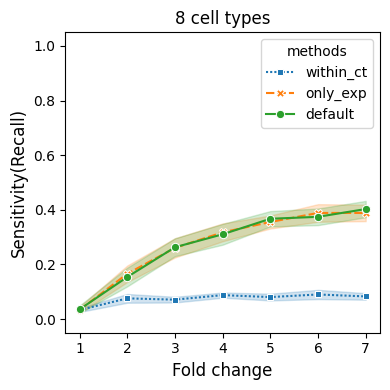

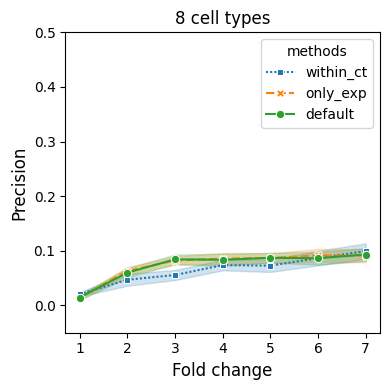

In [1159]:

plt.figure(figsize=(4,4))
ax = sns.lineplot(x='foldchange',y='F1 score',hue='methods',hue_order = ['within_ct','only_exp','default'],style='methods',markers=True,data=df_permu_summary, dashes=True,ci='sd',estimator='median')
plt.ylim([-0.05,0.5])
plt.xticks(range(1,8))
plt.ylabel('F1 score',fontsize=12)
plt.xlabel('Fold change',fontsize=12)
plt.title(title_name,fontsize=12)
plt.tight_layout()
plt.savefig(datap+'output/Figs/'+tile_name2+'.f1score_plot.pdf')


plt.figure(figsize=(4,4))
ax = sns.lineplot(x='foldchange',y='Specificity',hue='methods',hue_order = ['within_ct','only_exp','default'],style='methods',markers=True,dashes=True,data=df_permu_summary,ci='sd',estimator='median')
plt.ylim([0.5,1.05])
plt.xticks(range(1,8))
plt.ylabel('Specificity',fontsize=12)
plt.xlabel('Fold change',fontsize=12)
plt.title(title_name,fontsize=12)
plt.tight_layout()
plt.savefig(datap+'output/Figs/'+tile_name2+'.specificity_plot.pdf')


plt.figure(figsize=(4,4))
ax = sns.lineplot(x='foldchange',y='Recall',hue='methods',hue_order = ['within_ct','only_exp','default'],style='methods',markers=True,data=df_permu_summary, dashes=True,ci='sd',estimator='median')
plt.ylim([-0.05,1.05])
plt.xticks(range(1,8))
plt.ylabel('Recall',fontsize=12)
plt.xlabel('Fold change',fontsize=12)
plt.title(title_name,fontsize=12)
plt.tight_layout()
plt.savefig(datap+'output/Figs/'+tile_name2+'.recall_plot.pdf')


plt.figure(figsize=(4,4))
ax = sns.lineplot(x='foldchange',y='Sensitivity',hue='methods',hue_order = ['within_ct','only_exp','default'],style='methods',markers=True,data=df_permu_summary, dashes=True,ci='sd',estimator='median')
plt.ylim([-0.05,1.05])
plt.xticks(range(1,8))
plt.ylabel('Sensitivity(Recall)',fontsize=12)
plt.xlabel('Fold change',fontsize=12)
plt.title(title_name,fontsize=12)
plt.tight_layout()
plt.savefig(datap+'output/Figs/'+tile_name2+'.sensitivity_plot.pdf')


plt.figure(figsize=(4,4))
ax = sns.lineplot(x='foldchange',y='Precision',hue='methods',hue_order = ['within_ct','only_exp','default'],style='methods',markers=True,data=df_permu_summary, dashes=True,ci='sd',estimator='median')
plt.ylim([-0.05,0.5])
plt.xticks(range(1,8))
plt.ylabel('Precision',fontsize=12)
plt.xlabel('Fold change',fontsize=12)
plt.title(title_name,fontsize=12)
plt.tight_layout()
plt.savefig(datap+'output/Figs/'+tile_name2+'.precision_plot.pdf')

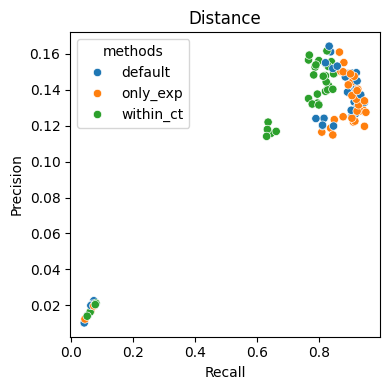

In [1055]:
plt.figure(figsize=(4,4))
ax = sns.scatterplot(x='Recall',y='Precision',hue='methods',data=df_permu_summary)
#plt.ylim([-0.05,0.5])
#plt.xticks(range(1,8))
#plt.ylabel('Precision',fontsize=12)
#plt.xlabel('Fold change',fontsize=12)
plt.title(title_name,fontsize=12)
plt.tight_layout()

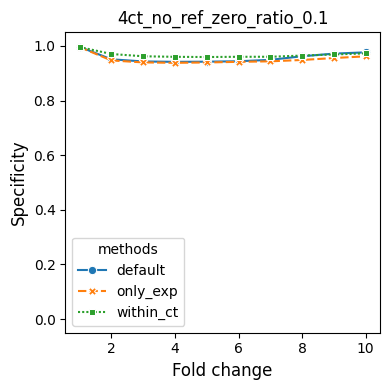

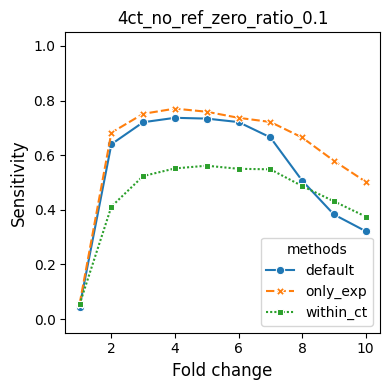

In [5]:
#df1 = pd.read_csv(datap+'output/4ct_no_ref_zero0.8_3permu_result.txt')
df1 = pd.read_csv(datap+'output/4ct_no_ref_zero0.1_3permu_result.txt')
#df1 = pd.read_csv(datap+'output/8ct_with_ref_3permu_result.txt')

#df1 = pd.read_csv(datap+'output/4ct_with_ref_3permu_result.txt')
#title_name = '4ct'
#title_name = '8ct'
title_name = '4ct_no_ref_zero_ratio_0.1'
#title_name = '4ct_no_ref_zero_ratio_0.8'

df1.columns = ['label_2','Sensitivity','Specificity','fscore']

df1['foldchange'] = [int(x.split("|")[0][:-2]) for x in df1['label_2']]
df1['methods'] = [x.split("|")[1] for  x in df1['label_2'] ]
df1

plt.figure(figsize=(4,4))
ax = sns.lineplot(x='foldchange',y='Specificity',hue='methods',style='methods',markers=True,data=df1, dashes=True,ci='sd',estimator='median')
plt.ylim([-0.05,1.05])
plt.ylabel('Specificity',fontsize=12)
plt.xlabel('Fold change',fontsize=12)
plt.title(title_name,fontsize=12)
plt.tight_layout()
plt.savefig(datap+'output/Figs/'+title_name+'.specificity_plot.pdf')


plt.figure(figsize=(4,4))
ax = sns.lineplot(x='foldchange',y='Sensitivity',hue='methods',style='methods',markers=True,data=df1, dashes=True,ci='sd',estimator='median')
plt.ylim([-0.05,1.05])
plt.ylabel('Sensitivity',fontsize=12)
plt.xlabel('Fold change',fontsize=12)
plt.title(title_name,fontsize=12)
plt.tight_layout()
plt.savefig(datap+'output/Figs/'+title_name+'.sensitivity_plot.pdf')

# summary different parameters

In [1329]:
#summarize permutation results
#for sample_id in sample_new_l:
for sample_id in sample_new_l:
    print(sample_id)
    final_summary = pd.DataFrame([])
    for i_n in range(int(it_n)):
        final_summary_tmp = pd.read_csv(datap+'output/permutation/summary/'+sample_id+'_test.permu.'+str(i_n)+'.csv',header = 0,sep = "\t")

        if final_summary.shape[0]>0:
            final_summary = pd.concat([final_summary,final_summary_tmp])
        else:
            final_summary = final_summary_tmp
    
        final_summary.to_csv(datap+'output/permutation/summary/'+sample_id+'_test.permu.default.csv',header = True, index = False, sep = "\t")
        

5fc_rep_1_dis10
5fc_rep_1_dis30
5fc_rep_1_dis70
5fc_rep_1_dis100


In [1331]:
it_n = 50
#for sample_id in sample_new_l:
for sample_id in ['5fc_rep_1_dis10','5fc_rep_1_dis30','5fc_rep_1_dis70','5fc_rep_1_dis100']:
    print(sample_id)
    for compared_type in ['default']:
        df_ot = pd.DataFrame([])
        df_permu = pd.DataFrame([])

        compare_dic ={}

        #meta_df_fov = pd.read_csv(datap+'data/simu_5fc_rep_1_meta_exp.csv',index_col=0)

        for c_t_1 in set(meta_df_fov['annotation']):
            for c_t_2 in set(meta_df_fov['annotation']):
                #import ot result
                df_ot = read_data(datap+'output/ot/summary/'+sample_id+'_test.ot.csv')#final 

                #import permutation result
                df_permu = read_data(datap+'output/permutation/summary/'+sample_id+'_test.permu.'+compared_type+'.csv')
                

                df_ot['lr_pairs'] = [x.split('|')[0] for x in df_ot['label']]
                df_ot['cell_pairs'] = [x.split('|')[2] for x in df_ot['label']]  

                df_permu['it_n'] = [x.split('|')[-1] for x in df_permu['label']]
                df_permu['lr_pairs'] = [x.split('|')[0] for x in df_permu['label']]
                df_permu['label_new'] = df_permu['lr_pairs']+"|"+df_permu['it_n'].map(str)
                df_permu['cell_pairs'] = [x.split('|')[2] for x in df_permu['label']]


                c_t_p = c_t_1+"_"+c_t_2
                df_ot_tmp = df_ot[df_ot['cell_pairs'] == c_t_p]
                df_permu_tmp = df_permu[df_permu['cell_pairs'] == c_t_p]

                if df_permu_tmp.shape[0]>0:
                    df_ot_groupby = df_ot_tmp.groupby(['label'])['ave_likelihood'].sum().to_frame().reset_index()
                    df_ot_groupby.index = [x.split('|')[0] for x in df_ot_groupby['label']]
                    df_permu_groupby = df_permu_tmp.groupby(['label_new'])['ave_likelihood'].sum()

                    for i in df_ot_groupby.index:
                        compare_dic[i+"|"+sample_id+"|"+c_t_p] = 0
                        df_permu_groupby_sel = df_permu_groupby[df_permu_groupby.index.str.contains(i+"\|")]
                        for j in df_permu_groupby_sel:
                            if j > df_ot_groupby.loc[i,'ave_likelihood']:
                                compare_dic[i+"|"+sample_id+"|"+c_t_p] += 1/it_n

                p_l = [round(x,3) for x in compare_dic.values()]
                pvalue_adj = multipletests(p_l, alpha=0.05, method='fdr_bh')[1]
                pvalue_adj = [round(x,3) for x in pvalue_adj]

        permu_sum_df = pd.DataFrame({'sample_id': compare_dic.keys(),'permu_pvalue': compare_dic.values(),'adj_permu_pvalue':pvalue_adj})
        permu_sum_df.to_csv(datap+'output/'+sample_id+"_permut."+compared_type+".csv")

5fc_rep_1_dis10
5fc_rep_1_dis30
5fc_rep_1_dis70
5fc_rep_1_dis100


In [1118]:
sample_new_l = []
for dis in [30,40,50,60,70,80]:
    for rep in range(1,6):
        #sample_new_l.append('5fc_rep_'+str(rep)+"_8ct_dis"+str(dis))
        sample_new_l.append('2fc_rep_'+str(rep)+"_8ct_dis"+str(dis))
for file in sample_new_l:
    print(file)

2fc_rep_1_8ct_dis30
2fc_rep_2_8ct_dis30
2fc_rep_3_8ct_dis30
2fc_rep_4_8ct_dis30
2fc_rep_5_8ct_dis30
2fc_rep_1_8ct_dis40
2fc_rep_2_8ct_dis40
2fc_rep_3_8ct_dis40
2fc_rep_4_8ct_dis40
2fc_rep_5_8ct_dis40
2fc_rep_1_8ct_dis50
2fc_rep_2_8ct_dis50
2fc_rep_3_8ct_dis50
2fc_rep_4_8ct_dis50
2fc_rep_5_8ct_dis50
2fc_rep_1_8ct_dis60
2fc_rep_2_8ct_dis60
2fc_rep_3_8ct_dis60
2fc_rep_4_8ct_dis60
2fc_rep_5_8ct_dis60
2fc_rep_1_8ct_dis70
2fc_rep_2_8ct_dis70
2fc_rep_3_8ct_dis70
2fc_rep_4_8ct_dis70
2fc_rep_5_8ct_dis70
2fc_rep_1_8ct_dis80
2fc_rep_2_8ct_dis80
2fc_rep_3_8ct_dis80
2fc_rep_4_8ct_dis80
2fc_rep_5_8ct_dis80


In [1125]:
#summary different parameter
sample_new_l = []
for rep in range(1,6):
    #for reg in [0.4,0.6,0.8,1.0,1.2,1.4,1.6]:
    #    sample_new_l.append('2fc_rep_'+str(rep)+"_8ct_reg"+str(reg)+"_regm2")
    for regm in [1.4,1.6,1.8,2.0,2.2,2.4,2.6]:
        sample_new_l.append('2fc_rep_'+str(rep)+"_8ct_reg1_regm"+str(regm))
for i in sample_new_l:
    print(i)

2fc_rep_1_8ct_reg1_regm1.4
2fc_rep_1_8ct_reg1_regm1.6
2fc_rep_1_8ct_reg1_regm1.8
2fc_rep_1_8ct_reg1_regm2.0
2fc_rep_1_8ct_reg1_regm2.2
2fc_rep_1_8ct_reg1_regm2.4
2fc_rep_1_8ct_reg1_regm2.6
2fc_rep_2_8ct_reg1_regm1.4
2fc_rep_2_8ct_reg1_regm1.6
2fc_rep_2_8ct_reg1_regm1.8
2fc_rep_2_8ct_reg1_regm2.0
2fc_rep_2_8ct_reg1_regm2.2
2fc_rep_2_8ct_reg1_regm2.4
2fc_rep_2_8ct_reg1_regm2.6
2fc_rep_3_8ct_reg1_regm1.4
2fc_rep_3_8ct_reg1_regm1.6
2fc_rep_3_8ct_reg1_regm1.8
2fc_rep_3_8ct_reg1_regm2.0
2fc_rep_3_8ct_reg1_regm2.2
2fc_rep_3_8ct_reg1_regm2.4
2fc_rep_3_8ct_reg1_regm2.6
2fc_rep_4_8ct_reg1_regm1.4
2fc_rep_4_8ct_reg1_regm1.6
2fc_rep_4_8ct_reg1_regm1.8
2fc_rep_4_8ct_reg1_regm2.0
2fc_rep_4_8ct_reg1_regm2.2
2fc_rep_4_8ct_reg1_regm2.4
2fc_rep_4_8ct_reg1_regm2.6
2fc_rep_5_8ct_reg1_regm1.4
2fc_rep_5_8ct_reg1_regm1.6
2fc_rep_5_8ct_reg1_regm1.8
2fc_rep_5_8ct_reg1_regm2.0
2fc_rep_5_8ct_reg1_regm2.2
2fc_rep_5_8ct_reg1_regm2.4
2fc_rep_5_8ct_reg1_regm2.6


In [1126]:
test_l = []
sen_l = []
spec_l = []
fscore_l = []
pre_l = []
for sample_id in sample_new_l:
    print(sample_id)
    #ground truth
    meta_df_fov = pd.read_csv(datap+'data/simu_'+sample_id[:13]+'_meta_exp.csv',index_col=0)
    if 'no_ref' in sample_id:
        if '8ct' not in sample_id:
            ground_truth_df = pd.read_csv(datap+'data/cosmx_LR_dat_random.csv',index_col=None)
        else:
            ground_truth_df = pd.read_csv(datap+'data/cosmx_LR_dat_random_8ct.csv',index_col=None)
           
    else:
        if '8ct' not in sample_id:
            ground_truth_df = pd.read_csv(datap+'data/cosmx_LR_dat.csv',index_col=None)
        else:
            ground_truth_df = pd.read_csv(datap+'data/cosmx_LR_dat_8ct.csv',index_col=None)
            
    true_pos = list(ground_truth_df.iloc[:,0]+ "_"+ground_truth_df.iloc[:,1]+ "_"+ground_truth_df.iloc[:,2]+ "_"+ground_truth_df.iloc[:,3])
    true_neg = []
    for x in range(ground_truth_df.shape[0]):
        for ct1 in set(meta_df_fov['annotation']):
            for ct2 in set(meta_df_fov['annotation']):
                if ct1+"_"+ct2 != ground_truth_df.iloc[x,2]+"_"+ground_truth_df.iloc[x,3]:
                    true_neg.append(ground_truth_df.iloc[x,0]+"_"+ground_truth_df.iloc[x,1]+"_"+ct1+"_"+ct2)
    

    for compared_type in ['default']:
        permu_sum_df = pd.read_csv(datap+'output/'+sample_id+"_permut."+compared_type+".csv",index_col=0)
        permu_sum_df['label'] = [x.split("|")[0]+"_"+x.split("|")[2] for x in permu_sum_df['sample_id']]
        permu_sum_df = permu_sum_df[permu_sum_df['permu_pvalue']<0.05]
        pred_pos = list(permu_sum_df['label'])
        tp = len([x for x in pred_pos if x in true_pos])
        tn = len([x for x in true_neg if x not in pred_pos])
        fp = len([x for x in pred_pos if x not in true_pos])
        fn = len([x for x in true_pos if x  not in pred_pos])
        fscore_l.append(2*tp/(2*tp+fp+fn))
     
        test_l.append(sample_id)
        sen_l.append(tp/(tp+fn))
        spec_l.append(tn/(tn+fp))
        pre_l.append(tp/(tp+fp))

2fc_rep_1_8ct_reg1_regm1.4
2fc_rep_1_8ct_reg1_regm1.6
2fc_rep_1_8ct_reg1_regm1.8
2fc_rep_1_8ct_reg1_regm2.0
2fc_rep_1_8ct_reg1_regm2.2
2fc_rep_1_8ct_reg1_regm2.4
2fc_rep_1_8ct_reg1_regm2.6
2fc_rep_2_8ct_reg1_regm1.4
2fc_rep_2_8ct_reg1_regm1.6
2fc_rep_2_8ct_reg1_regm1.8
2fc_rep_2_8ct_reg1_regm2.0
2fc_rep_2_8ct_reg1_regm2.2
2fc_rep_2_8ct_reg1_regm2.4
2fc_rep_2_8ct_reg1_regm2.6
2fc_rep_3_8ct_reg1_regm1.4
2fc_rep_3_8ct_reg1_regm1.6
2fc_rep_3_8ct_reg1_regm1.8
2fc_rep_3_8ct_reg1_regm2.0
2fc_rep_3_8ct_reg1_regm2.2
2fc_rep_3_8ct_reg1_regm2.4
2fc_rep_3_8ct_reg1_regm2.6
2fc_rep_4_8ct_reg1_regm1.4
2fc_rep_4_8ct_reg1_regm1.6
2fc_rep_4_8ct_reg1_regm1.8
2fc_rep_4_8ct_reg1_regm2.0
2fc_rep_4_8ct_reg1_regm2.2
2fc_rep_4_8ct_reg1_regm2.4
2fc_rep_4_8ct_reg1_regm2.6
2fc_rep_5_8ct_reg1_regm1.4
2fc_rep_5_8ct_reg1_regm1.6
2fc_rep_5_8ct_reg1_regm1.8
2fc_rep_5_8ct_reg1_regm2.0
2fc_rep_5_8ct_reg1_regm2.2
2fc_rep_5_8ct_reg1_regm2.4
2fc_rep_5_8ct_reg1_regm2.6


In [1128]:
df_permu_summary = pd.DataFrame({'label':test_l,'Sensitivity':sen_l,'Specificity':spec_l,'F1 score':fscore_l,'Precision':pre_l})
df_permu_summary
#df_permu_summary['Distance'] = [int(x.split("_")[-1][3:]) for x in df_permu_summary['label']]
#df_permu_summary.to_csv(datap+'output/5fc_8ct_dist_test.txt')
#df_permu_summary.to_csv(datap+'output/2fc_8ct_dist_test.txt')


#df_permu_summary_sel = df_permu_summary[df_permu_summary['label'].str.contains('regm2$')]
#df_permu_summary_sel['Reg'] = [float(x.split("_")[-2][3:]) for x in df_permu_summary_sel['label']]
#df_permu_summary_sel
#df_permu_summary_sel.to_csv(datap+'output/5fc_8ct_reg_test.txt')
#df_permu_summary_sel.to_csv(datap+'output/2fc_8ct_reg_test.txt')


df_permu_summary_sel = df_permu_summary[df_permu_summary['label'].str.contains('reg1_')]
df_permu_summary_sel['Reg_m'] = [float(x.split("_")[-1][4:]) for x in df_permu_summary_sel['label']]
df_permu_summary_sel
#df_permu_summary_sel.to_csv(datap+'output/5fc_8ct_regm_test.txt')
df_permu_summary_sel.to_csv(datap+'output/2fc_8ct_regm_test.txt')

In [1165]:
df1 = pd.read_csv(datap+'output/2fc_8ct_dist_test.txt',index_col=0)
df2 = pd.read_csv(datap+'output/2fc_8ct_reg_test.txt',index_col=0)
df2
df3 = pd.read_csv(datap+'output/2fc_8ct_regm_test.txt',index_col=0)
df3


df1 = pd.read_csv(datap+'output/5fc_8ct_dist_test.txt',index_col=0)
df2 = pd.read_csv(datap+'output/5fc_8ct_reg_test.txt',index_col=0)
df2
df3 = pd.read_csv(datap+'output/5fc_8ct_regm_test.txt',index_col=0)
df3

,label,Sensitivity,Specificity,F1 score,Precision,Reg_m
0,5fc_rep_1_8ct_reg1_regm1.4,0.402844,0.943015,0.161367,0.100890,1.4
1,5fc_rep_1_8ct_reg1_regm1.6,0.402844,0.943391,0.162136,0.101493,1.6
2,5fc_rep_1_8ct_reg1_regm1.8,0.402844,0.943579,0.162524,0.101796,1.8
3,5fc_rep_1_8ct_reg1_regm2.0,0.407583,0.943730,0.164593,0.103118,2.0
4,5fc_rep_1_8ct_reg1_regm2.2,0.409953,0.943805,0.165629,0.103779,2.2
5,5fc_rep_1_8ct_reg1_regm2.4,0.417062,0.944407,0.169557,0.106409,2.4
6,5fc_rep_1_8ct_reg1_regm2.6,0.409953,0.944520,0.167150,0.104976,2.6
7,5fc_rep_2_8ct_reg1_regm1.4,0.334123,0.940156,0.130919,0.081409,1.4
8,5fc_rep_2_8ct_reg1_regm1.6,0.336493,0.941022,0.133208,0.083041,1.6
9,5fc_rep_2_8ct_reg1_regm1.8,0.334123,0.941736,0.133523,0.083432,1.8


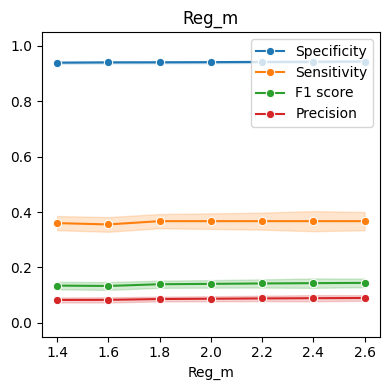

In [1168]:
#title_name = 'Distance'
title_name = 'Reg_m'
#tile_name2 = '5fc_8ct'
plt.figure(figsize=(4,4))
ax = sns.lineplot(x=title_name,y='Specificity',markers=True,marker = 'o',data=df3, dashes=True,ci='sd',estimator='median',label='Specificity')
ax = sns.lineplot(x=title_name,y='Sensitivity',markers=True,marker = 'o',data=df3, dashes=True,ci='sd',estimator='median',label='Sensitivity')
ax = sns.lineplot(x=title_name,y='F1 score',markers=True,marker = 'o',data=df3, dashes=True,ci='sd',estimator='median',label='F1 score')
ax = sns.lineplot(x=title_name,y='Precision',markers=True,marker = 'o',data=df3, dashes=True,ci='sd',estimator='median',label='Precision')

plt.ylim([-0.05,1.05])
#plt.xticks(range(1,11))
plt.ylabel('',fontsize=12)
#plt.xlabel('Fold change',fontsize=12)
plt.title(title_name,fontsize=12)
plt.tight_layout()
plt.savefig(datap+'output/Figs/'+title_name+'.5fc.ss_plot.pdf')



In [ ]:

plt.figure(figsize=(4,4))
ax = sns.lineplot(x=title_name,y='Sensitivity',markers=True,marker = 'o',data=df3, dashes=True,ci='sd',estimator='median',label='Recall')
ax = sns.lineplot(x=title_name,y='Precision',markers=True,marker = 'o',data=df3, dashes=True,ci='sd',estimator='median',label='Precision')

plt.ylim([-0.05,1.05])
#plt.xticks(range(1,11))
plt.ylabel('',fontsize=12)
#plt.xlabel('Fold change',fontsize=12)
plt.title(title_name,fontsize=12)
plt.tight_layout()
plt.savefig(datap+'output/Figs/'+title_name+'.2f.pr.pdf')

In [1431]:
df1 = pd.read_csv(datap+'output/4ct_no_ref_zero0.8_3permu_result.txt')
df1 = pd.read_csv(datap+'output/4ct_no_ref_zero0.1_3permu_result.txt')
df1 = pd.read_csv(datap+'output/8ct_with_ref_3permu_result.txt')

df1 = pd.read_csv(datap+'output/4ct_with_ref_3permu_result.txt')
title_name = '4ct'
#title_name = '8ct'
#title_name = '4ct_no_ref_zero_ratio_0.1'
#title_name = '4ct_no_ref_zero_ratio_0.8'

df1.columns = ['label_2','Sensitivity','Specificity']

df1['foldchange'] = [int(x.split("|")[0][:-2]) for x in df1['label_2']]
df1['methods'] = [x.split("|")[1] for  x in df1['label_2'] ]
df1

plt.figure(figsize=(4,4))
ax = sns.lineplot(x='foldchange',y='Specificity',hue='methods',style='methods',markers=True,data=df1, dashes=True,estimator='median')
plt.ylim([-0.05,1.05])
plt.ylabel('Specificity',fontsize=12)
plt.xlabel('Fold change',fontsize=12)
plt.title(title_name,fontsize=12)
plt.tight_layout()
plt.savefig(datap+'output/Figs/'+title_name+'.specificity_plot.pdf')

,label_2,Sensitivity,Specificity,foldchange,methods
0,10fc|default,0.243365,0.983100,10,default
1,10fc|only_exp,0.237204,0.983533,10,only_exp
2,10fc|within_ct,0.099052,0.993230,10,within_ct
3,1fc|default,0.096209,0.993012,1,default
4,1fc|only_exp,0.096445,0.992987,1,only_exp
5,1fc|within_ct,0.045735,0.996816,1,within_ct
6,3fc|default,0.298815,0.978853,3,default
7,3fc|only_exp,0.303791,0.978505,3,only_exp
8,3fc|within_ct,0.086730,0.993981,3,within_ct
9,5fc|default,0.303555,0.978642,5,default


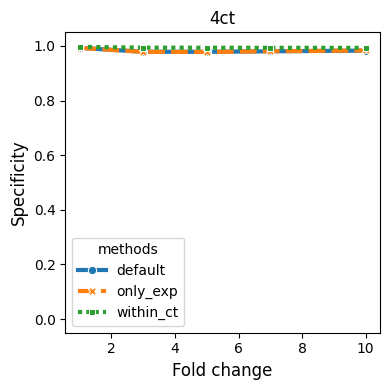

In [1437]:
plt.figure(figsize=(4,4))
ax = sns.lineplot(x='foldchange',y='Specificity',hue='methods',style='methods',markers=True,data=df1, dashes=True,estimator='median')
plt.ylim([-0.05,1.05])
plt.ylabel('Specificity',fontsize=12)
plt.xlabel('Fold change',fontsize=12)
plt.title(title_name,fontsize=12)
plt.tight_layout()
plt.savefig(datap+'output/Figs/'+title_name+'.specificity_plot.pdf')

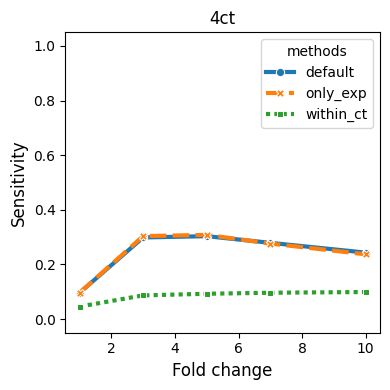

In [1439]:
plt.figure(figsize=(4,4))
ax = sns.lineplot(x='foldchange',y='Sensitivity',hue='methods',style='methods',markers=True,data=df1, dashes=True,estimator='median')
plt.ylim([-0.05,1.05])
plt.ylabel('Sensitivity',fontsize=12)
plt.xlabel('Fold change',fontsize=12)
plt.title(title_name,fontsize=12)
plt.tight_layout()
plt.savefig(datap+'output/Figs/'+title_name+'.sensitivity_plot.pdf')

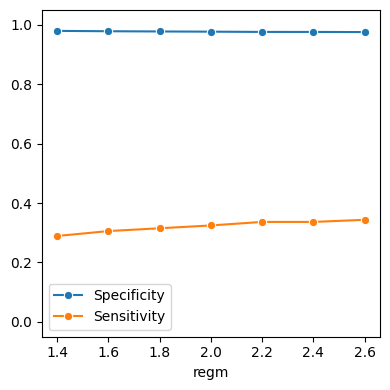

In [1505]:
df1 = pd.read_csv(datap+'output/4ct_5fc_rep_1_reg_regm_test.txt',index_col=0)
df1.columns = ['label_2','Sensitivity','Specificity']
df1.loc[12,:] = ['5fc_rep_1_reg1.0_regm2','0.324645','0.977052']
df1.loc[13,:] = ['5fc_rep_1_reg1_regm2.0','0.324645','0.977052']
#df1 = df1[df1['label_2'].str.contains("regm2$")]
df1 = df1[df1['label_2'].str.contains("reg1_")]
#df1['reg'] = [float(x.split("_")[3][3:]) for x in df1['label_2']]
df1['regm'] = [float(x.split("_")[4][4:]) for x in df1['label_2']]
df1

plt.figure(figsize=(4,4))
ax = sns.lineplot(x='regm',y='Specificity',marker='o',data=df1, dashes=True,estimator='median',label='Specificity')
ax = sns.lineplot(x='regm',y='Sensitivity',marker='o',data=df1, dashes=True,estimator='median',label='Sensitivity')
plt.ylim([-0.05,1.05])
plt.ylabel('',fontsize=12)
#plt.xlabel('Fold change',fontsize=12)
#plt.title(title_name,fontsize=12)
plt.tight_layout()
#plt.savefig(datap+'output/Figs/'+title_name+'.specificity_plot.pdf')

In [1495]:
df1 = pd.read_csv(datap+'output/4ct_5fc_rep_1_distance_test.txt',index_col=0)
df1.loc[4,:] = ['5fc_rep_1_dis50','0.324645','0.977052']
df1['distance'] = [int(x.split("_")[3][3:]) for x in df1['label']]
df1

,label,sensitivity,specificyt,distance
0,5fc_rep_1_dis10,0.14218,0.990209,10
1,5fc_rep_1_dis30,0.272512,0.981098,30
2,5fc_rep_1_dis70,0.400474,0.971229,70
3,5fc_rep_1_dis100,0.447867,0.96729,100
4,5fc_rep_1_dis50,0.324645,0.977052,50


In [1506]:
df1 = pd.read_csv(datap+'output/4ct_5fc_rep_1_distance_test.txt',index_col=0)
df1.columns = ['label_2','Sensitivity','Specificity']
df1.loc[4,:] = ['5fc_rep_1_dis50','0.324645','0.977052']
df1['distance'] = [int(x.split("_")[3][3:]) for x in df1['label_2']]



In [ ]:
plt.figure(figsize=(4,4))
plt.ylim([1.05,-0.05])
ax = sns.lineplot(x='distance',y='Specificity',marker='o',data=df1, dashes=True,estimator='median',label='Specificity')
ax = sns.lineplot(x='distance',y='Sensitivity',marker='o',data=df1, dashes=True,estimator='median',label='Sensitivity')
#plt.ylim([-0.05,1.05])
#plt.ylabel('',fontsize=12)
#plt.xlabel('Fold change',fontsize=12)
#plt.title(title_name,fontsize=12)
plt.tight_layout()
#plt.savefig(datap+'output/Figs/'+title_name+'.specificity_plot.pdf')

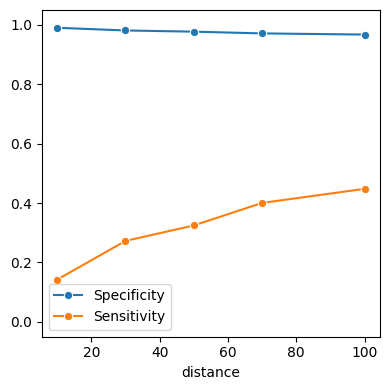

In [1507]:
plt.figure(figsize=(4,4))
ax = sns.lineplot(x='distance',y='Specificity',marker='o',data=df1, dashes=True,estimator='median',label='Specificity')
ax = sns.lineplot(x='distance',y='Sensitivity',marker='o',data=df1, dashes=True,estimator='median',label='Sensitivity')
plt.ylim([-0.05,1.05])
plt.ylabel('',fontsize=12)
#plt.xlabel('Fold change',fontsize=12)
#plt.title(title_name,fontsize=12)
plt.tight_layout()
#plt.savefig(datap+'output/Figs/'+title_name+'.specificity_plot.pdf')

# PDAC

In [763]:
###summarize all newwwwwwwwwwwww
c_t_1 = 'CAF'
c_t_2 = 'Malignant'

ctrl_l = ['011','011_2nd','B10','C4','D10','004','2626','2626_B','2924']
treat_l = ['2462','2540','2675','2762','2762_2nd','2997','2692']

#for par in ['reg0.4_reg2.0','reg0.6_reg2.0','reg0.8_reg2.0','reg1.0_reg2.0','reg1.2_reg2.0','reg1.4_reg2.0','reg1.6_reg2.0']:
#for par in ['reg1.0_reg1.4','reg1.0_reg1.6','reg1.0_reg1.8','reg1.0_reg2.0','reg1.0_reg2.2','reg1.0_reg2.4','reg1.0_reg2.6']:
for par in ['dis20','dis30','dis40','dis50','dis60','dis70','dis80','dis90']:
#for par in ['dis50']:
    print(par)

    #df_summary = pd.read_csv(datap+'../11.lr_analysis/transport_result_all/summary/all_sample_all_ori_new_raw_'+par+'.csv',header = None, index_col = None, sep = '\t')
    df_summary = pd.read_csv(datap+'../11.lr_analysis/transport_result_all/summary/all_sample_all_ori_new_raw_'+par+'.csv',header = None, index_col = None, sep = '\t')
   
    df_summary.columns = ['label','likelihood']
    df_summary = df_summary[df_summary['likelihood']>0.05]
    df_summary['sample_label'] = [x.split("|")[1] for x in df_summary['label']]
    df_summary['lr_pairs'] = [x.split("|")[0] for x in  df_summary['label']]
    df_summary['cell_pairs'] = [x.split("|")[2] for x in  df_summary['label']]
    df_sel = df_summary[df_summary['cell_pairs']==c_t_1+"_"+c_t_2]
    


    pvalue_dic = {}
    statictics_dic = {}
    fold_change = {}
    #fold_change_mean = {}

    likeli_treat = {}
    #likeli_mean = {}
    likeli_ctrl = {}


    for lr_pair in list(set(df_sel['lr_pairs'])):
    #for lr_pair in ['CLCF1_CNTFR']:
    #for lr_pair in ['THBS1_TNFRSF11B']:
    #for lr_pair in ['PF4_CXCR3']:
        df_sum_fi_sel = df_sel[df_sel['lr_pairs']==lr_pair]

        df_ctrl =  df_sum_fi_sel[df_sum_fi_sel['sample_label'].isin(ctrl_l)]
        tmpp_ctrl = df_ctrl.groupby(['label'])['likelihood'].quantile(q = 0).reset_index()
        tmpp_ctrl.columns = ['label','low_50']
        tmpp_ctrl = df_ctrl.merge(tmpp_ctrl)
        tmpp_ctrl = tmpp_ctrl[tmpp_ctrl['likelihood']>=tmpp_ctrl['low_50']]
        df_ctrl_groupby = tmpp_ctrl.groupby(['label'])['likelihood'].mean()
        df_ctrl_size = tmpp_ctrl.groupby(['label'])['likelihood'].size()
        df_ctrl_size = np.sum([x for x in df_ctrl_size if x <2])

        df_treat = df_sum_fi_sel[df_sum_fi_sel['sample_label'].isin(treat_l)]
        tmpp_treat = df_treat.groupby(['label'])['likelihood'].quantile(q=0).reset_index()
        tmpp_treat.columns = ['label','low_50']
        tmpp_treat = df_treat.merge(tmpp_treat)
        tmpp_treat = tmpp_treat[tmpp_treat['likelihood']>=tmpp_treat['low_50']]
        df_treat_groupby = tmpp_treat.groupby(['label'])['likelihood'].mean()
        df_treat_size = tmpp_treat.groupby(['label'])['likelihood'].size()
        df_treat_size = np.sum([x for x in df_treat_size if x <2])

        if len(set(df_ctrl['sample_label']))>=5 and len(set(df_treat['sample_label']))>=5 and df_ctrl_size<=1 and df_treat_size<=1:
        #if len(set(df_ctrl['sample_label']))>=2 and len(set(df_treat['sample_label']))>=2:
            likeli_treat[lr_pair] = np.mean(tmpp_treat['likelihood'])
            likeli_ctrl[lr_pair] = np.mean(tmpp_ctrl['likelihood'])
            #log_fc = np.log10(np.median(tmpp_treat['likelihood'])/np.median(tmpp_ctrl['likelihood']))
            log_fc = np.log10(np.mean(tmpp_treat['likelihood'])/np.mean(tmpp_ctrl['likelihood']))
            fold_change[lr_pair] = log_fc
            pvalue_dic[lr_pair] = ranksums(tmpp_ctrl['likelihood'],tmpp_treat['likelihood'])[1]
            statictics_dic[lr_pair] = ranksums(tmpp_ctrl['likelihood'],tmpp_treat['likelihood'])[0]

    p_l = [x if np.isnan(x)==False else 1.0 for x in pvalue_dic.values()]
    pvalue_adj = multipletests(p_l, alpha=0.05, method='fdr_bh')[1]
    
    
    df_summary = pd.DataFrame({'lr_pairs': fold_change.keys(),'lr_likellihood_treat_mean':likeli_treat.values(),\
                           'lr_likellihood_ctrl_mean':likeli_ctrl.values(),\
                           'log10_fc':fold_change.values(), 'Wilcoxon': pvalue_dic.values(), 'Wilcoxon_adj_pvalue': pvalue_adj,'Wixcon_s':statictics_dic.values()})
                          

    df_summary = df_summary.set_index(['lr_pairs'])
    df_summary.index.name = ''
    df_summary['label'] = ['kept_great' if (df_summary.loc[x,'log10_fc']>np.log10(1)) else 'kept_less' if (df_summary.loc[x,'log10_fc']<-np.log10(1)) else 'filtered' for x in df_summary.index]
    df_summary_diff_up = df_summary[(df_summary['label']=='kept_great') ]
    df_summary_diff_down = df_summary[(df_summary['label']=='kept_less')]
    
    df_summary_non_diff = df_summary[df_summary['Wilcoxon_adj_pvalue']>0.05]
    print(df_summary_non_diff.shape)
    df_summary_sel2 = pd.concat([df_summary_diff_up,df_summary_diff_down])


    down_sig = df_summary_diff_down[df_summary_diff_down['Wilcoxon_adj_pvalue']<0.05]
    up_sig = df_summary_diff_up[df_summary_diff_up['Wilcoxon_adj_pvalue']<0.05]
    print(up_sig.shape)
    print(down_sig.shape)
    df_summary_sel = pd.concat([up_sig,down_sig])
    df_summary_sel.to_csv(datap+'../11.lr_analysis/transport_result_all/summary/'+par+"_caf_mal_DE_result.csv")

dis20
(60, 7)
(0, 7)
(3, 7)
dis30
(140, 7)
(10, 7)
(19, 7)
dis40
(200, 7)
(22, 7)
(35, 7)
dis50
(229, 7)
(24, 7)
(60, 7)
dis60
(259, 7)
(18, 7)
(64, 7)
dis70
(271, 7)
(14, 7)
(68, 7)
dis80
(306, 7)
(10, 7)
(50, 7)
dis90
(314, 7)
(8, 7)
(50, 7)


## cocluture results

In [764]:
cocul_exp = pd.read_csv(datap+'../13.coculture/coculture_normed_exp.csv',sep=',',header=0,index_col=0)
cocul_anno = pd.read_csv(datap+'../13.coculture/cell_annotation.csv',sep=',',header=0,index_col=0)
cocul_exp2 = cocul_exp.join(cocul_anno['group'])
cocul_exp2 = cocul_exp2.set_index('group')
cocul_exp2

##select group
df_caf_treated = cocul_exp2[cocul_exp2.index =='Treated_CAF']
df_caf_ctrl = cocul_exp2[cocul_exp2.index =='Untreated_CAF']
df_mal_treated = cocul_exp2[cocul_exp2.index =='Treated_PDAC']
df_mal_ctrl = cocul_exp2[cocul_exp2.index =='Untreated_PDAC']

In [765]:
lr_pair = pd.read_csv(datap+'../11.lr_analysis/tf_analysis/cosMx_l_r_pairs.txt',sep='\t',header=None)
lr_pair.columns = ['ligand','receptor']
lr_pair = lr_pair[lr_pair['ligand'].isin(cocul_exp2.columns)]
lr_pair = lr_pair[lr_pair['receptor'].isin(cocul_exp2.columns)]
lr_pair[(lr_pair['ligand']=='COL1A1') & (lr_pair['receptor']=='ITGB1')]


,ligand,receptor
103,COL1A1,ITGB1


In [766]:
###DE
caf_p_l = []
caf_s_l = []
mal_p_l = []
mal_s_l = []
lig_diff_l = []
rec_diff_l = []

for lig in lr_pair['ligand']:
    exp_caf_t = df_caf_treated[lig]
    exp_caf_u = df_caf_ctrl[lig]
    tmp1 = ranksums(list(exp_caf_t), list(exp_caf_u))
    caf_p_l.append(tmp1[1])
    caf_s_l.append(tmp1[0])
    lig_diff_l.append(np.mean(exp_caf_t)/(np.mean(exp_caf_u)+0.0001))
for rec in lr_pair['receptor']:
    exp_mal_t = df_mal_treated[rec]
    exp_mal_u = df_mal_ctrl[rec]
    tmp1 = ranksums(list(exp_mal_t), list(exp_mal_u))
    mal_p_l.append(tmp1[1])
    mal_s_l.append(tmp1[0])
    rec_diff_l.append(np.mean(exp_mal_t)/(np.mean(exp_mal_u)+0.0001))
    
caf_p_adj = multipletests(caf_p_l, alpha=0.05, method='fdr_bh')[1]
mal_p_adj = multipletests(mal_p_l, alpha=0.05, method='fdr_bh')[1]

In [767]:
lr_pair['lig_diff'] = [np.log2(x) if x!=0 else 0 for x in lig_diff_l]
lr_pair['caf_pvalue'] = caf_p_l
lr_pair['caf_pvalue_adj'] = caf_p_adj
lr_pair['caf_statistic'] = caf_s_l

lr_pair['rec_diff'] = [np.log2(x) if x!=0 else 0 for x in rec_diff_l]
lr_pair['mal_pvalue'] = mal_p_l
lr_pair['mal_pvalue_adj'] = mal_p_adj
lr_pair['mal_statistic'] = mal_s_l
lr_pair['lr_fc'] = lr_pair['lig_diff']+lr_pair['rec_diff']

In [1176]:
#df_up_lig = lr_pair[(lr_pair['lig_diff']>0) & (lr_pair['caf_pvalue_adj']<0.1) & (lr_pair['rec_diff']>=0)]
#df_up_rec = lr_pair[(lr_pair['rec_diff']>0) & (lr_pair['mal_pvalue_adj']<0.1) & (lr_pair['lig_diff']>=0)]

#df_down_lig = lr_pair[(lr_pair['lig_diff']<0) & (lr_pair['caf_pvalue_adj']<0.1) & (lr_pair['rec_diff']<=0)]
#df_down_rec = lr_pair[(lr_pair['rec_diff']<0) & (lr_pair['mal_pvalue_adj']<0.1) & (lr_pair['lig_diff']<=0)]

df_up_lig = lr_pair[(lr_pair['lig_diff']>np.log2(1.5))  & (lr_pair['rec_diff']>=0)]
df_up_rec = lr_pair[(lr_pair['rec_diff']>np.log2(1.5))  & (lr_pair['lig_diff']>=0)]

df_down_lig = lr_pair[(lr_pair['lig_diff']<-np.log2(1.5))  & (lr_pair['rec_diff']<=0)]
df_down_rec = lr_pair[(lr_pair['rec_diff']<-np.log2(1.5))  & (lr_pair['lig_diff']<=0)]

#df_up_lig = lr_pair[(lr_pair['lig_diff']>0)  & (lr_pair['lr_fc']>0) & (lr_pair['caf_pvalue_adj']<0.05)]
#df_up_rec = lr_pair[(lr_pair['rec_diff']>0)  & (lr_pair['lr_fc']>0) & (lr_pair['mal_pvalue_adj']<0.05)]

df_up_all = pd.concat([df_up_lig,df_up_rec])
df_up_all = df_up_all.drop_duplicates(inplace=False)
df_up_all

df_down_all = pd.concat([df_down_lig,df_down_rec])
df_down_all = df_down_all.drop_duplicates(inplace=False)


true_pos_lr_list = list(df_up_all['ligand']+"_"+df_up_all['receptor'])
print(len(true_pos_lr_list))
true_neg_lr_list = [x for x in lr_pair['ligand']+"_"+lr_pair['receptor'] if x not in true_pos_lr_list]
#true_neg_lr_list = list(df_down_all['ligand']+"_"+df_down_all['receptor'])
print(len(true_neg_lr_list))

72
320


In [1177]:
len(true_pos+true_neg)
df1.shape

(30, 6)

In [1193]:
len(true_pos)
len(true_neg)

82

In [1182]:
gene_all = []
#for par in ['reg0.4_reg2.0','reg0.6_reg2.0','reg0.8_reg2.0','reg1.0_reg2.0','reg1.2_reg2.0','reg1.4_reg2.0','reg1.6_reg2.0']:
for par in ['reg1.0_reg1.4','reg1.0_reg1.6','reg1.0_reg1.8','reg1.0_reg2.0','reg1.0_reg2.2','reg1.0_reg2.4','reg1.0_reg2.6']:
#for par in ['dis30','dis40','dis50','dis60','dis70','dis80','dis90']:
    df1 = pd.read_csv(datap+'../11.lr_analysis/transport_result_all/summary/'+par+"_caf_mal_DE_result.csv",index_col=0)
    gene_all += list(df1.index)
gene_all = np.unique(gene_all)

label_l = []
sen_l = []
spec_l = []
num_l = []
fscore_l = []
recall_l = []
pre_l = []
#for par in ['reg0.4_reg2.0','reg0.6_reg2.0','reg0.8_reg2.0','reg1.0_reg2.0','reg1.2_reg2.0','reg1.4_reg2.0','reg1.6_reg2.0']:
for par in ['reg1.0_reg1.4','reg1.0_reg1.6','reg1.0_reg1.8','reg1.0_reg2.0','reg1.0_reg2.2','reg1.0_reg2.4','reg1.0_reg2.6']:
#for par in ['dis30','dis40','dis50','dis60','dis70','dis80','dis90']:
#for par in ['dis50']:
    print(par)
    df1 = pd.read_csv(datap+'../11.lr_analysis/transport_result_all/summary/'+par+"_caf_mal_DE_result.csv",index_col=0)
    print(df1[df1['label']=='kept_great'].shape)
    num_l.append(df1[df1['label']=='kept_great'].shape[0])
    overlap_lr = [x for x in list(df1.index) if x in true_pos_lr_list+true_neg_lr_list]
    df1 = df1.loc[overlap_lr]
    
    pred_pos = list(df1[df1['label']=='kept_great'].index)
    
    
    true_pos = [x for x in true_pos_lr_list if x in overlap_lr]
    true_neg = [x for x in true_neg_lr_list if x in overlap_lr]
    
    true_pos = [x for x in true_pos_lr_list if x in gene_all]
    true_neg = [x for x in true_neg_lr_list if x in gene_all]
    
    
    #true_pos = true_pos_lr_list
    #true_neg = true_neg_lr_list
    
    tp = len([x for x in pred_pos if x in true_pos])
    tn = len([x for x in true_neg if x not in pred_pos])
    fp = len([x for x in pred_pos if x not in true_pos])
    fn = len([x for x in true_pos if x not in pred_pos])
    fscore_l.append(2*tp/(2*tp+fp+fn))

    label_l.append(par)
    sen_l.append(tp/(tp+fn))
    spec_l.append(tn/(tn+fp))
    recall_l.append(tp/(tp+fn))
    pre_l.append(tp/(tp+fp))
    print(tp)
    print(fn)
    print(tn)
    print(fp)

reg1.0_reg1.4
(20, 7)
6
22
71
11
reg1.0_reg1.6
(21, 7)
6
22
70
12
reg1.0_reg1.8
(20, 7)
4
24
69
13
reg1.0_reg2.0
(24, 7)
5
23
66
16
reg1.0_reg2.2
(25, 7)
4
24
66
16
reg1.0_reg2.4
(26, 7)
4
24
65
17
reg1.0_reg2.6
(28, 7)
6
22
64
18


In [1183]:
df_tmp = pd.DataFrame({'label':label_l,'Sensitivity':sen_l,'Specificity':spec_l,'#Sig':num_l,'F1 score':fscore_l,'Precision':pre_l})
#df_tmp.to_csv(datap+'output/test_reg_comp.csv')
df_tmp.to_csv(datap+'output/test_reg_m_comp.csv')
#df_tmp.to_csv(datap+'output/test_dis_result_comp.csv')



df_tmp

,label,Sensitivity,Specificity,#Sig,F1 score,Precision
0,reg1.0_reg1.4,0.214286,0.865854,20,0.266667,0.352941
1,reg1.0_reg1.6,0.214286,0.853659,21,0.260870,0.333333
2,reg1.0_reg1.8,0.142857,0.841463,20,0.177778,0.235294
3,reg1.0_reg2.0,0.178571,0.804878,24,0.204082,0.238095
4,reg1.0_reg2.2,0.142857,0.804878,25,0.166667,0.200000
5,reg1.0_reg2.4,0.142857,0.792683,26,0.163265,0.190476
6,reg1.0_reg2.6,0.214286,0.780488,28,0.230769,0.250000


In [1111]:
df_tmp1

,label,Sensitivity,Specificity,#Sig,F1 score,Precision,label2
0,dis30,0.12500,0.941176,10,0.210526,0.666667,30
1,dis40,0.21875,0.794118,22,0.304348,0.500000,40
2,dis50,0.15625,0.852941,24,0.238095,0.500000,50
3,dis60,0.12500,0.852941,18,0.195122,0.444444,60
4,dis70,0.12500,0.852941,14,0.195122,0.444444,70
5,dis80,0.06250,0.911765,10,0.108108,0.400000,80
6,dis90,0.03125,0.882353,8,0.054054,0.200000,90


In [1184]:
#dis
df_tmp1 = pd.read_csv(datap+'output/test_dis_result_comp.csv',index_col=0)
df_tmp1['label2'] = [x[3:] for x in df_tmp1['label']]
df_tmp1 =  df_tmp1[df_tmp1['label2']!=str(90)]
#reg
df_tmp2 = pd.read_csv(datap+'output/test_reg_comp.csv',index_col=0)
df_tmp2['label2'] = [x.split("_")[0][3:] for x in df_tmp2['label']]
#reg_m
df_tmp3 = pd.read_csv(datap+'output/test_reg_m_comp.csv',index_col=0)
df_tmp3['label2'] = [x.split("_")[1][3:] for x in df_tmp3['label']]

#df_tmp_all = pd.concat([df_tmp1,df_tmp2,df_tmp3])
#df_tmp_all

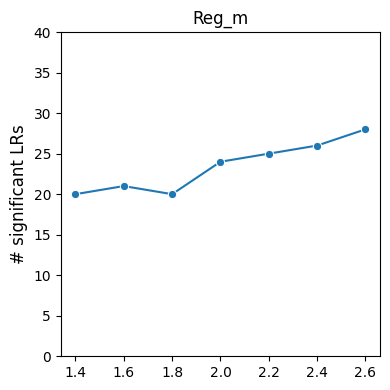

In [1175]:
title_name = 'Distance'
title_name = 'Reg'
title_name = 'Reg_m'
plt.figure(figsize=(4,4))
ax = sns.lineplot(x='label2',y='#Sig',markers=True,data=df_tmp3, dashes=True,marker='o')

plt.ylim([0,40])
plt.ylabel('# significant LRs',fontsize=12)
plt.xlabel('',fontsize=12)
plt.title(title_name,fontsize=12)
plt.tight_layout()
plt.savefig(datap+'output/Figs/'+title_name+'.sig_num_plot.pdf')

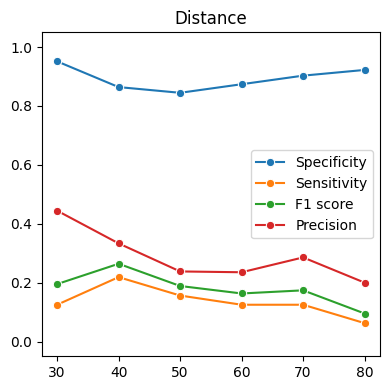

In [1190]:
title_name = 'Distance'
#title_name = 'Reg'
#title_name = 'Reg_m'
plt.figure(figsize=(4,4))
ax = sns.lineplot(x='label2',y='Specificity',markers=True,data=df_tmp1, dashes=True,marker='o',label='Specificity')
ax = sns.lineplot(x='label2',y='Sensitivity',markers=True,data=df_tmp1, dashes=True,marker='o',label='Sensitivity')
ax = sns.lineplot(x='label2',y='F1 score',markers=True,data=df_tmp1, dashes=True,marker='o',label='F1 score')
ax = sns.lineplot(x='label2',y='Precision',markers=True,data=df_tmp1, dashes=True,marker='o',label='Precision')
plt.ylim([-0.05,1.05])
plt.ylabel('',fontsize=12)
plt.xlabel('',fontsize=12)
plt.title(title_name,fontsize=12)
plt.tight_layout()
#plt.savefig(datap+'output/Figs/'+title_name+'.ss_plot.pdf')




In [1044]:
plt.figure(figsize=(4,4))
ax = sns.lineplot(x='label2',y='Precision',markers=True,data=df_tmp1, dashes=True,marker='o',label='Precision')
ax = sns.lineplot(x='label2',y='Sensitivity',markers=True,data=df_tmp1, dashes=True,marker='o',label='Recall')
plt.ylim([-0.05,1.05])
plt.ylabel('',fontsize=12)
plt.xlabel('',fontsize=12)
plt.title(title_name,fontsize=12)
plt.tight_layout()
plt.savefig(datap+'output/Figs/'+title_name+'.pr_plot.pdf')



,label,Sensitivity,Specificity,#Sig,F1 score,Precision,label2
0,dis30,0.12500,0.941176,10,0.210526,0.666667,30
1,dis40,0.21875,0.794118,22,0.304348,0.500000,40
2,dis50,0.15625,0.852941,24,0.238095,0.500000,50
3,dis60,0.12500,0.852941,18,0.195122,0.444444,60
4,dis70,0.12500,0.852941,14,0.195122,0.444444,70
5,dis80,0.06250,0.911765,10,0.108108,0.400000,80
6,dis90,0.03125,0.882353,8,0.054054,0.200000,90


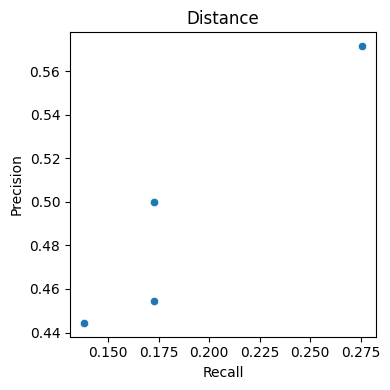

In [1052]:
plt.figure(figsize=(4,4))
#ax = sns.lineplot(x='Sensitivity',y='Precision',markers=True,data=df_tmp1, dashes=True,marker='o')
ax = sns.scatterplot(x='Sensitivity',y='Precision',data=df_tmp2)
#ax = sns.lineplot(x='Sensitivity',y='Precision',markers=True,data=df_tmp3, dashes=True,marker='o')
plt.title(title_name,fontsize=12)
plt.xlabel('Recall')
plt.tight_layout()
#plt.savefig(datap+'output/Figs/'+title_name+'.pr_plot.pdf')



In [ ]:
title_name = '8ct'
plt.figure(figsize=(4,4))
ax = sns.lineplot(x='foldchange',y='Specificity',hue='methods',style='methods',markers=True,data=df_permu_summary, dashes=True,ci='sd',estimator='median')
plt.ylim([-0.05,1.05])
plt.ylabel('Specificity',fontsize=12)
plt.xlabel('Fold change',fontsize=12)
plt.title(title_name,fontsize=12)
plt.tight_layout()
plt.savefig(datap+'output/Figs/'+title_name+'.specificity_plot.pdf')


plt.figure(figsize=(4,4))
ax = sns.lineplot(x='foldchange',y='Sensitivity',hue='methods',style='methods',markers=True,data=df_permu_summary, dashes=True,ci='sd',estimator='median')
plt.ylim([0.5,1.05])
plt.ylabel('Sensitivity',fontsize=12)
plt.xlabel('Fold change',fontsize=12)
plt.title(title_name,fontsize=12)
plt.tight_layout()
plt.savefig(datap+'output/Figs/'+title_name+'.sensitivity_plot.pdf')

In [886]:
df_tmp = pd.read_csv(datap + 'data/starmap_test.csv',index_col=0)
df_tmp = df_tmp.T
df_tmp.mean(axis=0).median()

0.3774145616641902